In [1]:
import ROOT
import numpy as np
import math as m
from ROOT import  TCanvas, TPad, TFormula, TF1, TPaveLabel, TH1F, TFile
from ROOT import gROOT, gBenchmark



Welcome to JupyROOT 6.22/02


In [2]:
#Functions 

def randomexp(a,x):
#function that returns random variables following an exponential distribution. It will be used to generate decay
#times and the direction fo the D0 meson generated
    if x!=1: 
        return (-a*np.log(1.0-x))

def Elab(mD0,pD0):
    #Function that retunr the energy of the D0 meson in the lab frame
    return (np.sqrt(pD0**2+mD0**2))

def betaD0(Elab,pD0):
    #Return beta of the meson D0
    return (pD0/Elab)

def gammaD0(betaD0):
    #gamma for the meson which is the same than betacm
    return (1/np.sqrt(1-betaD0**2))

def SF(mD0):
    #norm of quadrivecteur
    return (mD0**2)

def Eh1frame(s,mh1,mh2):
    #energy of h1
    return ((s+mh1**2-mh2**2)/(2*np.sqrt(s)))

def Eh2frame(s,mh1,mh2):
    #energy of h2
    return ((s-mh1**2+mh2**2)/(2*np.sqrt(s)))

def Prestframe(s,mh1,mh2):
    #modulus of momentum in the rest frame, it is the same for both particles h1 and h2
    return (np.sqrt((s**2+2*(mh1**2-mh2**2)*s+(mh1**2-mh2**2)**2)/(4*s)-mh1**2))

def PD0(mu,sigma,x,y):
    #function to generate momentum following a gaussian distribution, method of Box and Muller implemented
    if x!=1:
        return (mu+sigma*np.sqrt(-2*np.log(1-x))*np.cos(y))
    
def FRejAcc(max):
    return (1./max)


def Keff(pkminus):
    if 0.<=pkminus<6000.:
        return (1./1.025)
    elif 6000.<=pkminus<12000.:
        return (1./1.0211)
    elif 12000.<=pkminus<18000.:
        return (1./1.0175)
    elif 18000.<=pkminus<24000.:
        return (1./1.0154)
    elif 24000.<=pkminus<30000.:
        return (1./1.0146)
    elif 30000.<=pkminus<36000.:
        return (1./1.0160)
    elif 36000.<=pkminus<42000.:
        return (1./1.0133)
    elif 42000.<=pkminus<48000.:
        return (1./1.0153)
    elif 48000.<=54000.:
        return (1/1.0117)
    elif 54000.<=pkminus<60000.:
        return (1./1.0111)
    elif 60000.<=pkminus<66000.:
        return (1./1.0105)
    elif 66000.<=pkminus<72000.:
        return (1./1.0120)
    elif 72000.<=pkminus<78000.:
        return (1./1.0089)
    elif 78000.<=pkminus<84000.:
        return (1./1.0080)
    elif 84000.<=pkminus<90000.:
        return (1./1.0108)
    
    

def Peff(ppiminus):
    if 0.<=ppiminus<6000.:
        return (0.9796)
    elif 6000.<=ppiminus<12000.:
        return (0.9911)
    elif 12000.<=ppiminus<18000.:
        return (0.9943)
    elif 18000.<=ppiminus<24000.:
        return (0.9967)

    

In [3]:
#Asking for some initial values
#Units: mean time in fs and mass in Mev/c**2

tau=float(input("¿Mean time? "))

mD0=float(input("¿D0 mass? "))

n = int(input("¿Number of particles to simulate? "))

#Defining the impact parameter
IPmin=float(input("¿Minimum IP in metters? "))



¿Mean time? 410
¿D0 mass? 1864.84
¿Number of particles to simulate? 1000000
¿Minimum IP in metters? 50e-6


In [4]:
#I will change now the way of working respect to my previous program. I will create all arrays at first, and all 
#of them will have two colunms and n rows

#First, I define all classes in ROOT to call them more easily
v3d=ROOT.Math.XYZVector
v4d=ROOT.Math.PxPyPzEVector
b3d=ROOT.Math.Boost

#Defining the TRandom3 ROOT class and setting the seed to the machine clock
r=ROOT.TRandom3()
r.SetSeed()

#Defining the light speed
c=ROOT.TMath.C()


#Defining all arrays type float

#Dimension 2x1 because are constant for each event
s=np.zeros(2,"float")
mh1=np.zeros(2,"float")
a=np.zeros(2,"float")
aerr=np.zeros(2,"float")
b=np.zeros(2,"float")
berr=np.zeros(2,"float")
mh2=np.zeros(2,"float")
prframe=np.zeros(2,"float")
eh1frame=np.zeros(2,"float")
eh2frame=np.zeros(2,"float")
eh1lab=np.zeros(2,"float")
eh2lab=np.zeros(2,"float")
n2=np.zeros(2,"int")

#Dimension 2xn. I will create each one as a list of arrays because in that way I can modify the dimension 
# of the arrays when I apply the cut

h2phi=[np.zeros(n), np.zeros(n)]
h1phi=[np.zeros(n), np.zeros(n)]
h2teta=[np.zeros(n), np.zeros(n)]
h1teta=[np.zeros(n), np.zeros(n)]
arrphi=[np.zeros(n), np.zeros(n)]
arrteta=[np.zeros(n), np.zeros(n)]
arrtime=[np.zeros(n), np.zeros(n)]
arrgmD0=[np.zeros(n), np.zeros(n)]
arrelab=[np.zeros(n), np.zeros(n)]
arrphiD0=[np.zeros(n), np.zeros(n)]
arrtetaD0=[np.zeros(n), np.zeros(n)]
prc=[np.zeros(n), np.zeros(n)]
arrPD0=[np.zeros(n), np.zeros(n)]
IPh1=[np.zeros(n), np.zeros(n)]
IPh2=[np.zeros(n), np.zeros(n)]

#Defining all arrays of 4D-vectors. I will create each one as a list of arrays because in that way I can modify the dimension 
# of the arrays when I apply the cut

h1frame=[np.array([v4d() for i in range(n)]),np.array([v4d() for i in range(n)])]
h2frame=[np.array([v4d() for i in range(n)]),np.array([v4d() for i in range(n)])]
h1lab=[np.array([v4d() for i in range(n)]),np.array([v4d() for i in range(n)])]
h2lab=[np.array([v4d() for i in range(n)]),np.array([v4d() for i in range(n)])]

#Defining all arrays of 3D-vectors

arrdistance=[np.array([v3d() for i in range(n)]),np.array([v3d() for i in range(n)])]
arrbtD0=[np.array([v3d() for i in range(n)]),np.array([v3d() for i in range(n)])]

#Defining the boost

arrboost=[np.array([b3d() for i in range(n)]),np.array([b3d() for i in range(n)])]

#Defining lists, not arrays, of histograms. Actually, inside a list there are two list with only an element. I did
#that to respect everytime the use of the indices I have used for the rest of the arrays

    #Histograms for the momentum generated by the distribution of a function and a histogram. In the future it only 
    #will be generated by real histograms

hpd0=[TH1F("D0 momentum 1","histogram",100,0.,300000),TH1F("D0 momentum 2","histogram",100,0.,300000)]




    #Histogram generated by distribution of teta. I will have to change it

htetad0=[TH1F("D0 teta angle 1","histogram",100,0.,0.32),TH1F("D0 teta angle 2","histogram",100,0.,0.32)]

    #Histogram of the decay time

h1f=[TH1F("h1","histogram",100,0.,5000),TH1F("h2","histogram",100,0.,5000)]

    #Histogram for the teta angle generated following the uniform distribution for cos teta in the rest frame

h2f=[TH1F("teta1","histogram",100,0.,4),TH1F("teta2","histogram",100,0.,4)]

    #Histogram of the decay time but with the cut done

h3f=[TH1F('histogram1','h',100,0.,5000),TH1F('histogram2','h',100,0.,5000)]

#Opening the file where the real histogram for the D0 momentum is. I will use it to do the Rej-Acceptance method

myfile=TFile("d0_momentum.root")

#Coping the histogram in tfile

histreal=myfile.Get("d0_p")

#Normalizing the histogram

histreal.Scale(1./(histreal.Integral()))



In [5]:
#I will run the whole program twice, one for one type of decay and the second for another type
for j in range(2):
    

    s[j]=SF(mD0)
    print(s[j])
    #Units: mean time in fs and mass in Mev/c**2

    mh1[j]=float(input("¿h1 mass? "))
    mh2[j]=float(input("¿h2 mass? "))



    #From here. I am trying to implement the reject, acceptance method to generate uniform variables 
    #following a real histogram from the TFile
    

    #Defining the constant C
    maxv=histreal.GetMaximum()
    #I should change the 40000 to a way to obtain the max X value ov the histogram
    C=maxv*300000

    #Rejection-acceptance method
    cont=0
    while cont<=n-1:
        rndm=r.Uniform(0,300000)
        histvalue=histreal.GetBinContent(histreal.FindBin(rndm))
        fvalue=C*FRejAcc(300000)
        aux=r.Rndm()
        if aux*fvalue<=histvalue:
            arrPD0[j][cont]=rndm
            cont=cont+1
            


    for i in range(n):
        hpd0[j].Fill(arrPD0[j][i])
    
    
    
    
    
    #Now, I generate the D0 direction. Angles: phi uniformly distributed between 0 and 2pi and tangent of teta 
    #follows an exponential distribution

    #Fill an histogram only to check the distribution of teta at the end



    for i in range(n):
    
        arrtetaD0[j][i]=np.arctan(randomexp(1./25,r.Rndm()))
        arrphiD0[j][i]=r.Uniform(0.,2*np.pi) 

        htetad0[j].Fill(arrtetaD0[j][i])
    
    
    htetad0[j].Sumw2()
    



                           
    #Calling all functions to have all constants I will need. Now, all constants are arrays, and the beta is a array
    #with inside a 3-D vector



    eh1frame[j]=Eh1frame(s[j],mh1[j],mh2[j])
    eh2frame[j]=Eh2frame(s[j],mh1[j],mh2[j])
    prframe[j]=Prestframe(s[j],mh1[j],mh2[j])
    #momentum in rest frame which will be a constant and equal for both particles
                   



    #Filling the histogram with the decay times generated folloging the exponential distribution    

    for i in range(n):
        arrelab[j][i]=Elab(mD0,arrPD0[j][i])
        arrbtD0[j][i]=v3d(betaD0(arrelab[j][i],arrPD0[j][i])*np.sin(arrtetaD0[j][i])*np.cos(arrphiD0[j][i]),betaD0(arrelab[j][i],arrPD0[j][i])*np.sin(arrtetaD0[j][i])*np.sin(arrphiD0[j][i]),betaD0(arrelab[j][i],arrPD0[j][i])*np.cos(arrtetaD0[j][i]))
        arrgmD0[j][i]=gammaD0(np.sqrt(arrbtD0[j][i].mag2()))
        arrtime[j][i]=randomexp(tau,r.Rndm())
    
        h1f[j].Fill(arrtime[j][i])
    
    h1f[j].Sumw2()
    
    

    #myfile = TFile( 'timedata.root', 'RECREATE' )
    #h1f[j].Write()


    #myfile.Close()


    #Here I fit the histogram with an exponential fuction, and print the value obtained which should be mean time


    f1=TF1("xfit","exp(-x/[0])*[1]",0.,5000)
    f1.SetParameter(0,300)
    f1.SetParameter(1,300)
    h1f[j].Fit("xfit","SL")   
    f1=h1f[j].GetFunction("xfit")
    


    #the parameter a is 0 which is in the denominator inside the exponential, so should be tau.
    #The other one should be its inverse, the normalization constant.

    print(h1f[j].GetMean())
    a[j]=f1.GetParameter(0)
    aerr[j]=f1.GetParError(0)
    print(a[j] ," +- ", aerr[j])

    b[j]=f1.GetParameter(1)
    berr[j]=f1.GetParError(1)
    print(b[j], " +- ",berr[j])

    #Now it's the same but in log scale
    #c2 = TCanvas( 'c1', 'The FillRandom example', 200, 10, 700, 900 )
    #c2.SetLogy()

    #The E in the Draw command is to obtain the error of the histogram
    #f1.Draw()
    #h1f[j].Draw("E")
    #gROOT.GetListOfCanvases().Draw()


    #Generating n random numbers uniformly distributed between -1 and 1
    #Filling a second histogram with the angles
    for i in range(n):
        arrteta[j][i]=np.arccos(r.Uniform(-1.,1.))
        arrphi[j][i]=r.Uniform(0,2*np.pi) 
    
        h2f[j].Fill(arrteta[j][i])
    
    
    h2f[j].Sumw2()
    #c2.SetLogy(0)
    
    #h2f[j].Draw()

    #gROOT.GetListOfCanvases().Draw()

    #Using 4D vectors. Filling the 4d vector of the h1 and h2 particles in the rest frame

    for i in range(n):
        h1frame[j][i]=v4d(prframe[j]*np.sin(arrteta[j][i])*np.cos(arrphi[j][i]),prframe[j]*np.sin(arrteta[j][i])*np.sin(arrphi[j][i]),prframe[j]*np.cos(arrteta[j][i]),eh1frame[j])
        h2frame[j][i]=v4d(-prframe[j]*np.sin(arrteta[j][i])*np.cos(arrphi[j][i]),-prframe[j]*np.sin(arrteta[j][i])*np.sin(arrphi[j][i]),-prframe[j]*np.cos(arrteta[j][i]),eh2frame[j])

        #And now I use this for to build all boost I will need
    
        arrboost[j][i]=b3d(arrbtD0[j][i].X(),arrbtD0[j][i].Y(),arrbtD0[j][i].Z())
    
    

    #I build the 4d vectors in the lab frame using the boosts   
    for i in range(n):
        h1lab[j][i]=arrboost[j][i](h1frame[j][i])
        h2lab[j][i]=arrboost[j][i](h2frame[j][i])
    
    
    #And now I build two arrays with the angle teta and phi in the lab frame for each particle    
    for i in range(n):
        h1teta[j][i]=np.arctan(np.sqrt(h1lab[j][i].Py()**2+h1lab[j][i].Px()**2)/h1lab[j][i].Pz())
        h2teta[j][i]=np.arctan(np.sqrt(h2lab[j][i].Py()**2+h2lab[j][i].Px()**2)/h2lab[j][i].Pz())
        h1phi[j][i]=np.arctan(h1lab[j][i].Py()/h1lab[j][i].Px())
        h2phi[j][i]=np.arctan(h2lab[j][i].Py()/h2lab[j][i].Px())
    
    
    
        #For each decay time, I calculate the distance d that the meson has travelled. 
        #I have taken into account that time is in fs. Now, the distance is a 3D vector

        arrdistance[j][i]=arrbtD0[j][i]*arrgmD0[j][i]*c*arrtime[j][i]*10**(-15)
    
    



    print("Before cuts")
    #Method to delete the events that have an IP lower than the value. To do it, I start checking from the end of
    #the array
    #Explaining the numbers in the for: I start at the end of the array, so each time I erase one position, I do not
    #jump to the next value and I miss one uncheked. I go until -1 to check the last one, 0, the first position.
    #Finally, I use -1 as the step.

    for i in range(n-1,-1,-1):
        
        IPh1[j][i]=abs(np.sqrt(arrdistance[j][i].Cross(h1lab[j][i].Vect()).mag2()/h1lab[j][i].Vect().mag2()))
        
        IPh2[j][i]=abs(np.sqrt(arrdistance[j][i].Cross(h2lab[j][i].Vect()).mag2()/h2lab[j][i].Vect().mag2()))
        
        if abs(IPh1[j][i])<IPmin or abs(IPh2[j][i])<IPmin:
            arrtime[j]=np.delete(arrtime[j],i)
            arrdistance[j]=np.delete(arrdistance[j],i)
            h1frame[j]=np.delete(h1frame[j],i)
            h2frame[j]=np.delete(h2frame[j],i)
            h1lab[j]=np.delete(h1lab[j],i)
            h2lab[j]=np.delete(h2lab[j],i)
            h1teta[j]=np.delete(h1teta[j],i)
            h2teta[j]=np.delete(h2teta[j],i)
            arrbtD0[j]=np.delete(arrbtD0[j],i)
            arrgmD0[j]=np.delete(arrgmD0[j],i)
            arrboost[j]=np.delete(arrboost[j],i)
            arrelab[j]=np.delete(arrelab[j],i)
            arrtetaD0[j]=np.delete(arrtetaD0[j],i)
            arrPD0[j]=np.delete(arrPD0[j],i)
            arrphiD0[j]=np.delete(arrphiD0[j],i)
            arrteta[j]=np.delete(arrteta[j],i)
            IPh1[j]=np.delete(IPh1[j],i)
            IPh2[j]=np.delete(IPh2[j],i)

        
        
    print("after cuts")    
        
    n2[j]=len(arrtime[j])
    
    for i in range (n2[j]):
        if IPh1[j][i]<IPmin or IPh2[j][i]<IPmin:
            print (i)        
    
    print(len(arrtime[j]))

    for i in range(n2[j]):
        h3f[j].Fill(arrtime[j][i])
    
    h3f[j].Sumw2()
    


3477628.2255999995
¿h1 mass? 139.57
¿h2 mass? 139.57
409.4678093155403
409.4739855828325  +-  0.40987218905559164
122183.74467834795  +-  172.97835778247853
Before cuts
after cuts
444478
3477628.2255999995
¿h1 mass? 493.667
¿h2 mass? 493.667
410.2653911465206
410.2818333260129  +-  0.41069878487898814
121942.85956344965  +-  172.64450223357068
Before cuts
after cuts
409985
 FCN=47.2322 FROM MIGRAD    STATUS=CONVERGED     185 CALLS         186 TOTAL
                     EDM=1.05592e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           4.09474e+02   4.09872e-01   1.38117e-03   6.50323e-05
   2  p1           1.22184e+05   1.72978e+02   5.82663e-01  -4.74918e-07
                               ERR DEF= 0.5
 FCN=53.1275 FROM MIGRAD    STATUS=CONVERGED     158 CALLS         159 TOTAL
                     EDM=5.14606e-07    STRATEGY= 1     

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


In [63]:
prstore=np.array([v3d(i,i,i) for i in range(4)])

In [180]:
for j in range(2):
    f=open("D0IP50withouteff."+str(j)+".txt","w+")
    f.write("D0momentum"+"D0Decaytime "+"D0distanceX "+"D0distanceY "+"D0distanceZ "+"H14D.E "+"H14D.PX "+"H14D.PY "+"H14D.PZ "+"H24D.E "+"H24D.PX "+"H24D.PY "+"H24D.PZ "+"IPH1 "+"IPH2"+"\n")
    for i in range(n2[j]):
         
        f.write(str(arrPD0[j][i])+" "+ str(arrtime[j][i])+" "+ str(arrdistance[j][i].X()) +" "+str(arrdistance[j][i].Y())+" "+str(arrdistance[j][i].Z())+" "+str(h1lab[j][i].E())+" "+str(h1lab[j][i].Px())+" "+str(h1lab[j][i].Py())+" "+str(h1lab[j][i].Pz())+" "+str(h2lab[j][i].E())+" "+str(h2lab[j][i].Px())+" "+str(h2lab[j][i].Py())+" "+str(h2lab[j][i].Pz())+" "+str(IPh1[j][i])+" "+str(IPh2[j][i])+"\n")
    f.close()

In [358]:
print(n2[1])

409985


In [181]:
for j in range(2):
    f=open("D0IP100withouteffD0."+str(j)+".txt","w+")
    f.write("D0momentum"+"D0Decaytime "+"D0distanceX "+"D0distanceY "+"D0distanceZ "+"H14D.E "+"H14D.PX "+"H14D.PY "+"H14D.PZ "+"H24D.E "+"H24D.PX "+"H24D.PY "+"H24D.PZ "+"IPH1 "+"IPH2"+"\n")
    for i in range(n3[j]):
         
        f.write(str(arrPD02[j][i])+" "+ str(arrtime2[j][i])+" "+ str(arrdistance2[j][i].X()) +" "+str(arrdistance2[j][i].Y())+" "+str(arrdistance2[j][i].Z())+" "+str(h1lab2[j][i].E())+" "+str(h1lab2[j][i].Px())+" "+str(h1lab2[j][i].Py())+" "+str(h1lab2[j][i].Pz())+" "+str(h2lab2[j][i].E())+" "+str(h2lab2[j][i].Px())+" "+str(h2lab2[j][i].Py())+" "+str(h2lab2[j][i].Pz())+" "+str(IPh12[j][i])+" "+str(IPh22[j][i])+"\n")
    f.close()

In [183]:
for j in range(2):
    f=open("PionIP200witouteffD0."+str(j)+".txt","w+")
    f.write("D0momentum"+"D0Decaytime "+"D0distanceX "+"D0distanceY "+"D0distanceZ "+"H14D.E "+"H14D.PX "+"H14D.PY "+"H14D.PZ "+"H24D.E "+"H24D.PX "+"H24D.PY "+"H24D.PZ "+"IPH1 "+"IPH2"+"\n")
    for i in range(n200[j]):
         
        f.write(str(arrPD03[j][i])+" "+ str(arrtime3[j][i])+" "+ str(arrdistance3[j][i].X()) +" "+str(arrdistance3[j][i].Y())+" "+str(arrdistance3[j][i].Z())+" "+str(h1lab3[j][i].E())+" "+str(h1lab3[j][i].Px())+" "+str(h1lab3[j][i].Py())+" "+str(h1lab3[j][i].Pz())+" "+str(h2lab3[j][i].E())+" "+str(h2lab3[j][i].Px())+" "+str(h2lab3[j][i].Py())+" "+str(h2lab3[j][i].Pz())+" "+str(IPh13[j][i])+" "+str(IPh23[j][i])+"\n")
    f.close()

55430.25517202833


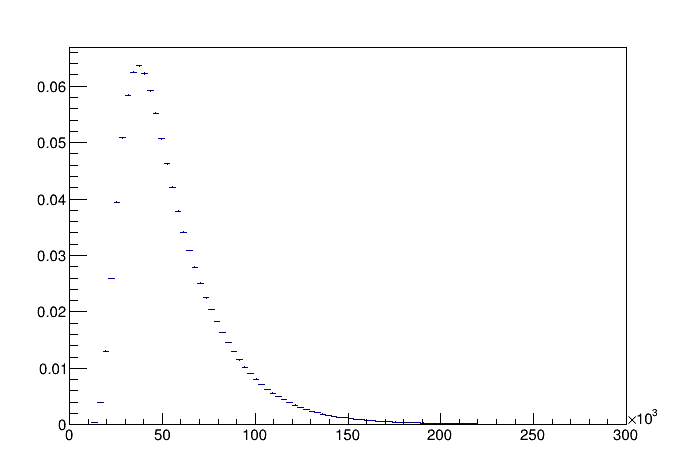

In [361]:
cfin=TCanvas()
histreal.Draw()
mean=histreal.GetMean()
print(mean)
cfin.Draw()

In [ ]:
#Here, I am going to print histograms for the IP, it lacks the last one for IP 150e-6

Warning in <TFile::Append>: Replacing existing TH1: new (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: new2 (Potential memory leak).


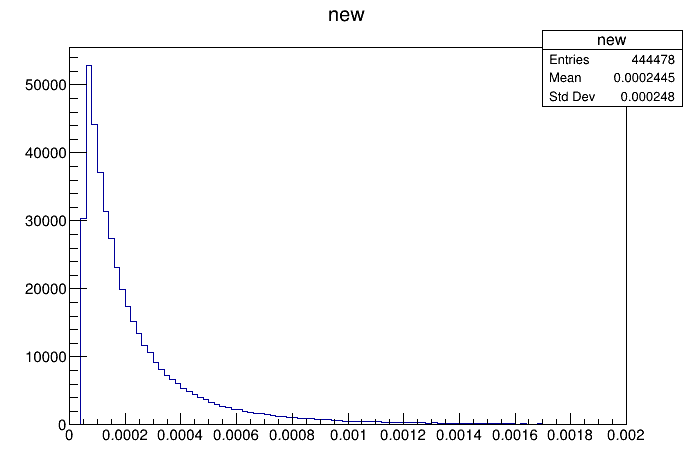

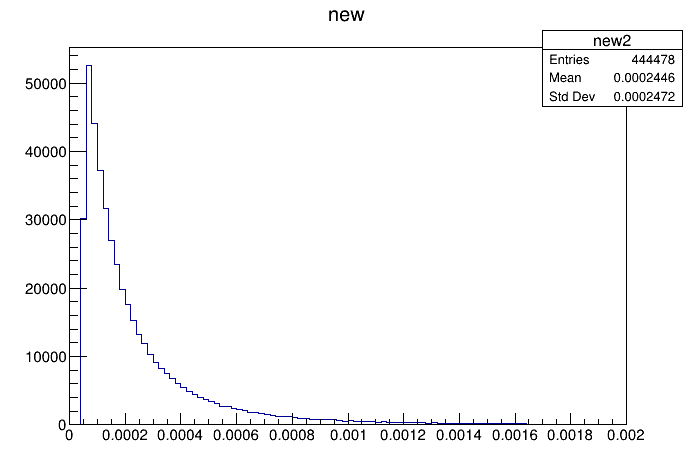

In [36]:
#Histograms of IP for the cut 50e-6 and for j=0, pions
histIP=TH1F("new","new",100,0.,2e-3)
histIP2=TH1F("new2","new",100,0.,2e-3)
for i in range(n2[0]):
    histIP.Fill(IPh1[0][i])
    histIP2.Fill(IPh2[0][i])
    
c20=TCanvas()
histIP.Draw()
c20.Draw()

c21=TCanvas()
histIP2.Draw()
c21.Draw()


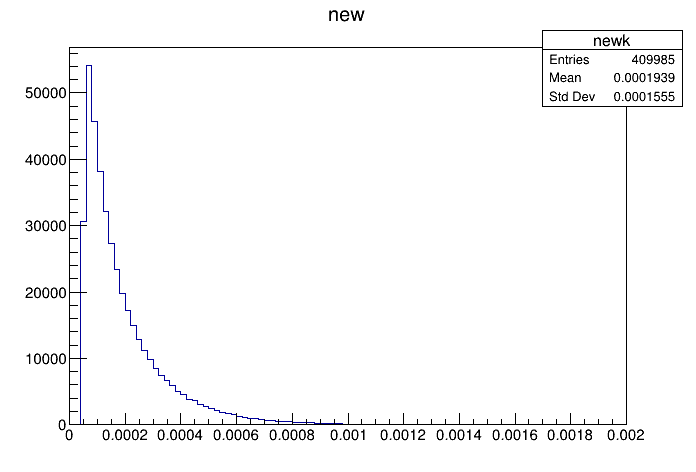

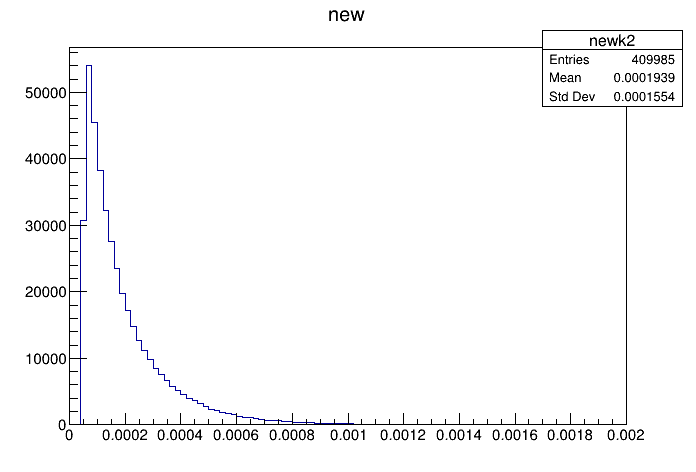

In [37]:
#Histograms of IP for the cut 50e-6 and for j=1, kaons
histkIP=TH1F("newk","new",100,0.,2e-3)
histkIP2=TH1F("newk2","new",100,0.,2e-3)
for i in range(n2[1]):
    histkIP.Fill(IPh1[1][i])
    histkIP2.Fill(IPh2[1][i])
    
c22=TCanvas()
histkIP.Draw()
c22.Draw()

c23=TCanvas()
histkIP2.Draw()
c23.Draw()

In [ ]:
#From here, I print all histograms of data obtained

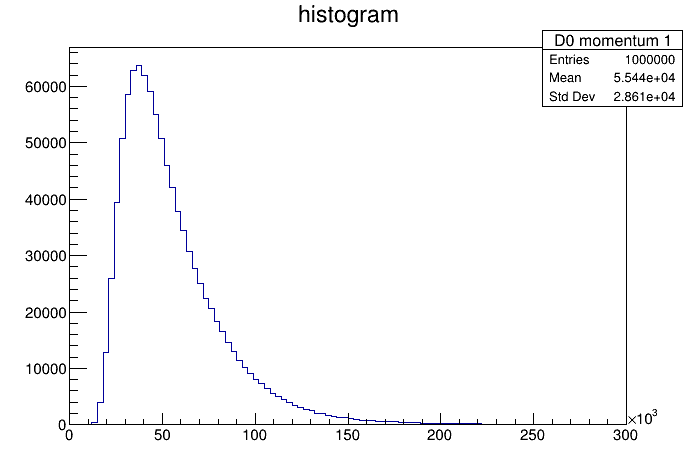

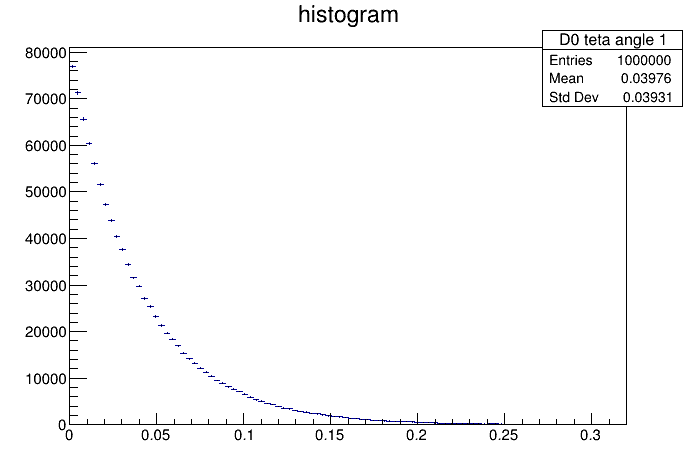

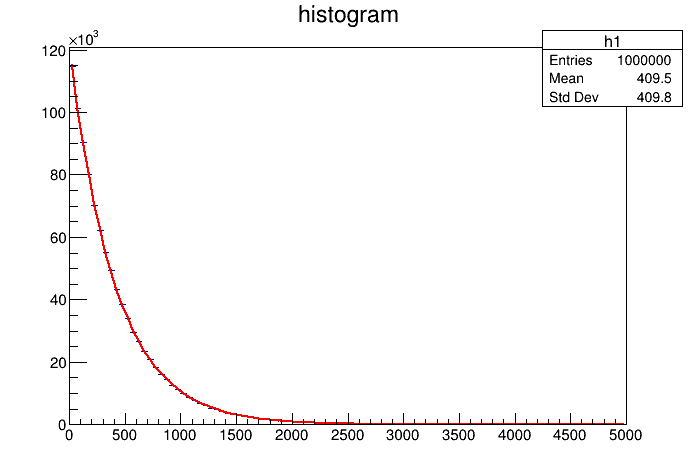

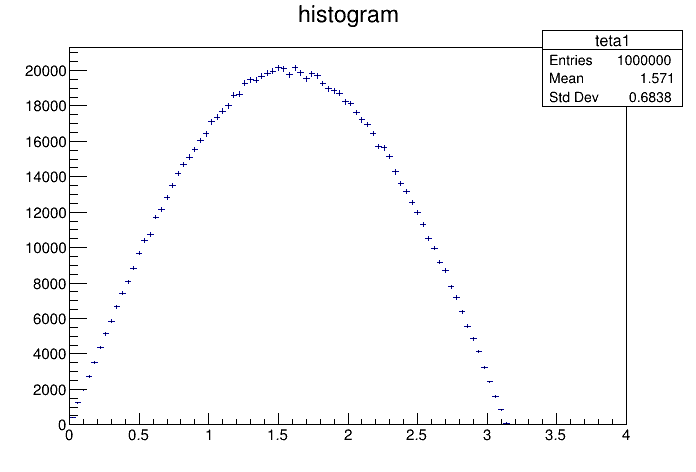

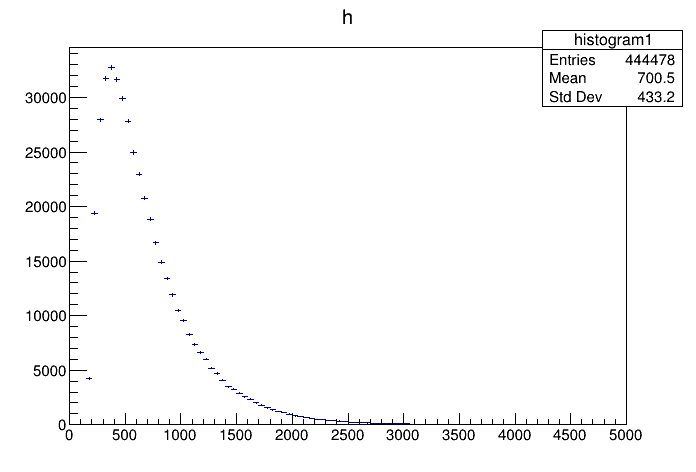

In [6]:
# I draw all histograms for the first particle to check everything
c1=TCanvas()
hpd0[0].Draw()
c1.Draw()

c2=TCanvas()
htetad0[0].Draw()
c2.Draw()

c3=TCanvas()
h1f[0].Draw()
c3.Draw()

c4=TCanvas()
h2f[0].Draw()
c4.Draw()

c5=TCanvas()
h3f[0].Draw()
c5.Draw()

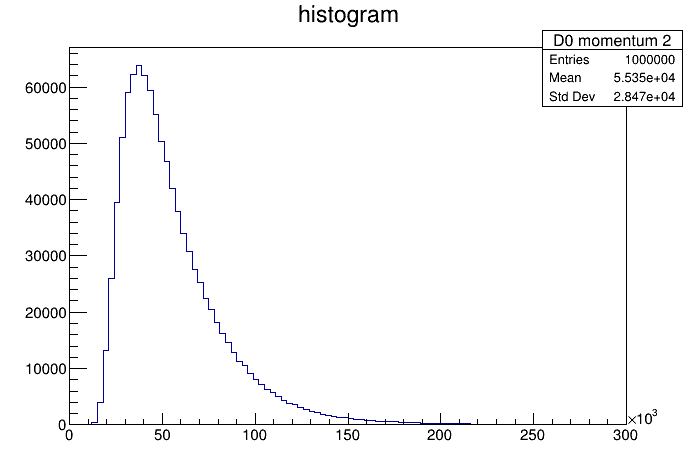

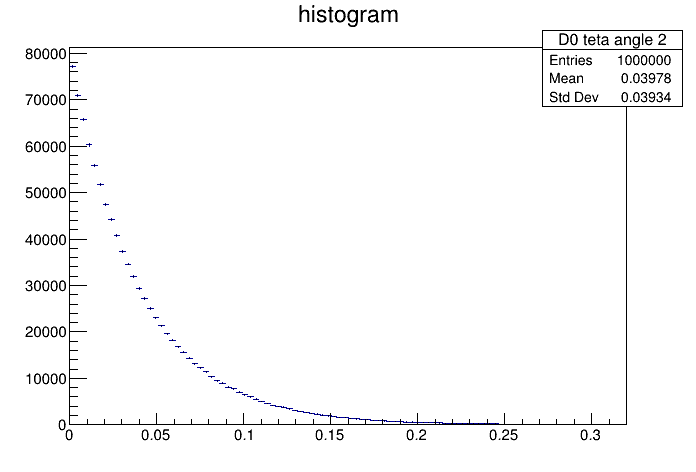

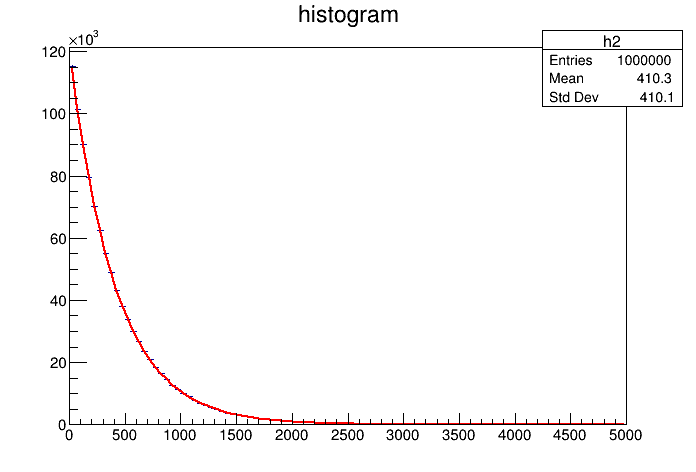

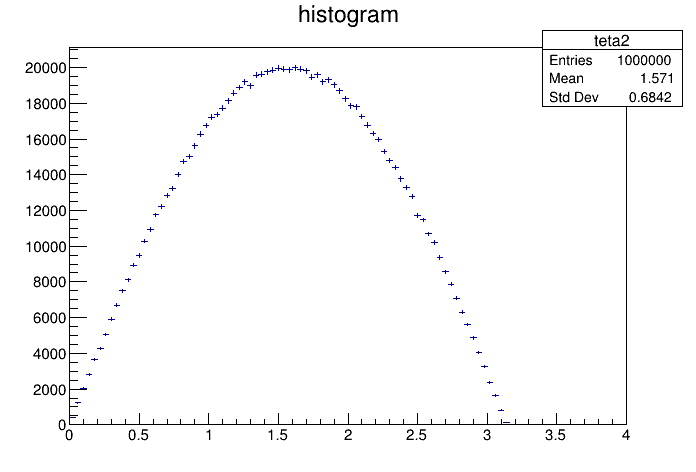

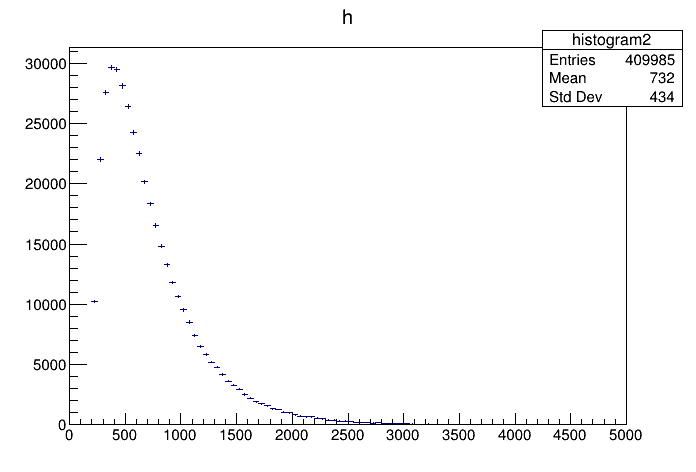

In [7]:
# I draw all histograms for the first particle to check everything
c6=TCanvas()
hpd0[1].Draw()
c6.Draw()

c7=TCanvas()
htetad0[1].Draw()
c7.Draw()

c8=TCanvas()
h1f[1].Draw()
c8.Draw()

c9=TCanvas()
h2f[1].Draw()
c9.Draw()

c10=TCanvas()
h3f[1].Draw()
c10.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c11
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created


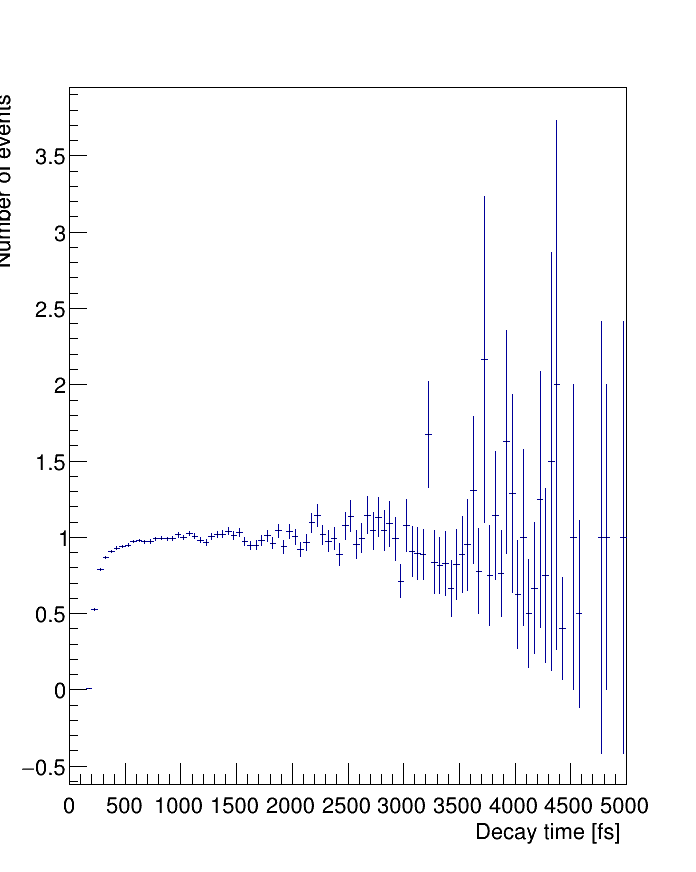

In [352]:
#Here, I do the ratio between k+k-/pi+pi- without efficiencies

c11=TCanvas( 'c11', 'The ratio between histograms', 200, 10, 700, 900 )

 
h3f[0].GetXaxis().SetTitle("Decay time [fs]")
h3f[0].GetYaxis().SetTitle("Number of events")
h3f[1].GetXaxis().SetTitle("Decay time [fs]")
h3f[1].GetYaxis().SetTitle("Number of events")
 
rp4 = h3f[1]/h3f[0]

rp4.Sumw2()
 


c11.Draw()
rp4.Draw()

2490.7063608313547
0.9958408745771472  +-  0.009746068848894333
-1.6762176896700012e-06  +-  8.209197024238823e-06
 FCN=83.2418 FROM MIGRAD    STATUS=CONVERGED     576 CALLS         577 TOTAL
                     EDM=3.47635e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   0.0 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           0.00000e+00   2.00000e+00  -0.00000e+00   0.00000e+00
   2  p1           0.00000e+00   2.00000e+00  -0.00000e+00   0.00000e+00
   3  p2           9.95841e-01   9.74607e-03   3.07491e-04  -3.38092e-01
   4  p3          -1.67622e-06   8.20920e-06  -1.82073e-07  -3.45042e+02


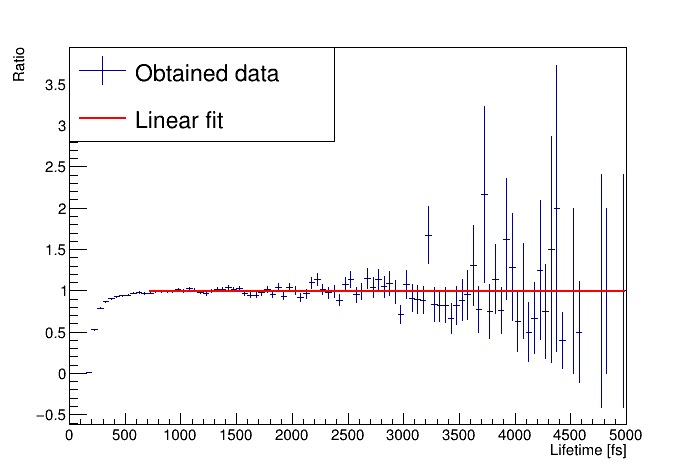

In [354]:
#Fiting the before histogram for t>700 fs
fratio=TF1("ratio", "[2]*(1+x*[3])",700.,5000.)
fratio.SetParameter(2,1.)
fratio.SetParameter(3,0.5)
rp4.Fit("ratio","","",700.,5000.)   
fratio=rp4.GetFunction("ratio")

c12=TCanvas()
c12.SetLogy(0)
rp4.Draw("E")
#fratio.Draw()


print(rp4.GetMean())
c=fratio.GetParameter(2)
cerr=fratio.GetParError(2)
print(c ," +- ", cerr)

d=fratio.GetParameter(3)
derr=fratio.GetParError(3)
print(d, " +- ",derr)
rp4.GetXaxis().SetTitle("Lifetime [fs]")
rp4.GetYaxis().SetTitle("Ratio")
rp4.GetYaxis().SetTitleOffset(1.3)

legend=TLegend(0.1,0.7,0.48,0.9)
legend.AddEntry(rp4,"Obtained data","lep")
legend.AddEntry(fratio,"Linear fit","l")

legend.Draw()
c12.Draw()

In [364]:
h2labpr=h2lab[1].copy()
arrtimeprueba=arrtime[1].copy()
arrPD0prueba=arrPD0[1].copy()

In [365]:
#Efficiency method: First, I obtain the modulus of the momentum of the k-. By default, k+ is the one generated in
#the rest frame by the definition of theta, so the k- will be the oposite, so its name is h2
#After that, if the modulus is less than 90 GeV/c, I obtain the efficiency of the detector (less than 1) calling 
#the function Feff and I generate a random number between 0 and 1. If the random number generated is higher than
#the value of the efficiency, I delete this particle. It's like if the detector could not detect this k-, so the
#corresponding D0 meson is deleted

for i in range(n2[1]-2,-1,-1):
    pk=np.sqrt(h2labpr[i].Vect().mag2())
    
    if pk<90000.0:
        eff=Keff(pk)
        
        nrndm=r.Rndm()
        
        if nrndm>eff:
            
            h2labpr=np.delete(h2labpr,i)
            arrtimeprueba=np.delete(arrtimeprueba,i)
            arrPD0prueba=np.delete(arrPD0prueba,i)

In [366]:
print(len(arrtimeprueba))
print(len(h2labpr))
n2ef=len(h2labpr)
kaonef=TH1F('histogramkaonef','h',100,0.,5000)

403540
403540


Warning in <TFile::Append>: Replacing existing TH1: histogramkaonef (Potential memory leak).


In [367]:
for i in range(n2ef):
    kaonef.Fill(arrtimeprueba[i])
    

 FCN=80.2749 FROM HESSE     STATUS=FAILED         11 CALLS         932 TOTAL
                     EDM=2.66452e-08    STRATEGY= 1  ERROR MATRIX UNCERTAINTY 100.0 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -2.54990e+05   4.24264e-01  -0.00000e+00   0.00000e+00
   2  p1           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   3  p2           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   4  p3           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   5  p4           9.80395e-01   3.37906e-03   6.25257e-05   9.40385e-03
   6  p5          -2.04269e-06   2.87235e-06  -4.36320e-08  -2.89377e+01


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c13
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created


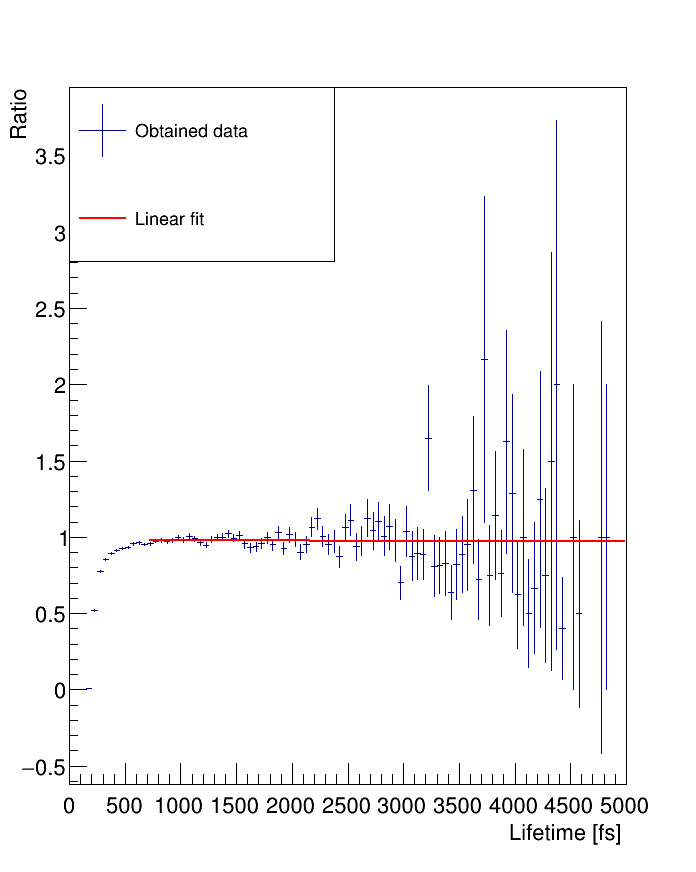

In [368]:
from ROOT import TLegend
#defining the ratio between k+k- with eff/pi+pi-
c13=TCanvas( 'c13', 'The ratio between histograms', 200, 10, 700, 900 )

  
rp10e = kaonef/h3f[0]
rp10.Sumw2()
 

#Fiting the histogram for t>700 fs
fratio2=TF1("ratio2", "[4]*(1+x*[5])",700.,5000.)
fratio2.SetParameter(4,1.)
fratio2.SetParameter(5,-0.5)
rp10e.Fit("ratio2","","",700.,5000.)   
fratio2=rp10e.GetFunction("ratio2")

rp10e.SetTitle("Ratio")
rp10e.GetXaxis().SetTitle("Lifetime [fs]")
rp10e.GetYaxis().SetTitle("Ratio")
rp10e.GetYaxis().SetTitleOffset(1.3)

legend=TLegend(0.1,0.7,0.48,0.9)
legend.AddEntry(rp10e,"Obtained data","lep")
legend.AddEntry(fratio2,"Linear fit","l")


rp10e.Draw("E")
legend.Draw()
c13.Draw()


 FCN=0.518784 FROM MINOS     STATUS=SUCCESSFUL    132 CALLS        2265 TOTAL
                     EDM=2.87935e-10    STRATEGY= 1  ERROR MATRIX UNCERTAINTY 100.0 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           0.00000e+00   1.69706e+00  -0.00000e+00   0.00000e+00
   2  p1           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   3  p2           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   4  p3           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   5  p4           9.84814e-01   2.18382e-03   6.50268e-06   5.55150e-09
   6  p5          -7.43613e-07   2.61476e-06   2.61476e-06  -1.03557e-05


Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created


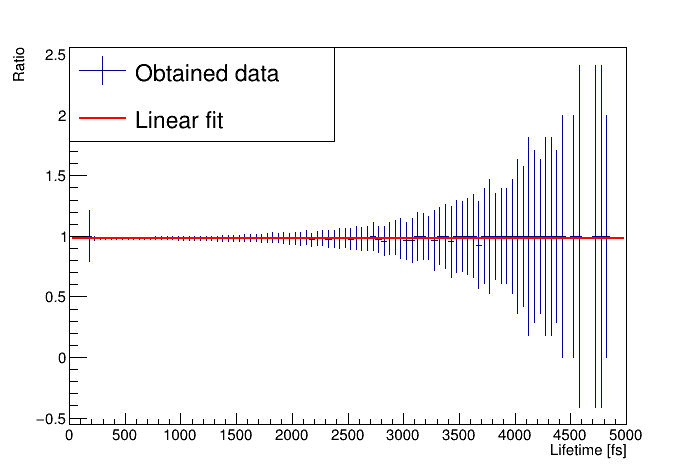

In [369]:
#Now, defining the ratio between k+k- with eff/k+k- without eff
c15=TCanvas()
rp11=kaonef/h3f[1]
rp11.Sumw2()

#Fiting the histogram 
fratio3=TF1("ratio3", "[4]*(1+x*[5])",0.,5000.)
fratio3.SetParameter(4,1.)
fratio3.SetParameter(5,0.)
rp11.Fit("ratio3","E","",0.,5000.)   
fratio3=rp11.GetFunction("ratio3")

rp11.SetTitle("Ratio")
rp11.GetXaxis().SetTitle("Lifetime [fs]")
rp11.GetYaxis().SetTitle("Ratio")
rp11.GetYaxis().SetTitleOffset(1.3)

legend=TLegend(0.1,0.7,0.48,0.9)
legend.AddEntry(rp11,"Obtained data","lep")
legend.AddEntry(fratio3,"Linear fit","l")

rp11.Draw()
legend.Draw()
c15.Draw()



In [47]:
h2labpr2=h2lab[0].copy()
arrtimeprueba2=arrtime[0].copy()

In [48]:
#Method to apply efficiencies to pions
for i in range(n2[0]-2,-1,-1):
    pk2=np.sqrt(h2labpr2[i].Vect().mag2())
    
    if pk2<24000.0:
        eff2=Peff(pk2)
        
        nrndm2=r.Rndm()
        
        if nrndm2>eff2:
            
            h2labpr2=np.delete(h2labpr2,i)
            arrtimeprueba2=np.delete(arrtimeprueba2,i)

In [49]:
print(len(h2labpr2))

442745


In [50]:
n3ef=len(h2labpr2)
Pionef=TH1F('histogrampionef','h',100,0.,5000)

for i in range(n3ef):
    Pionef.Fill(arrtimeprueba2[i])


Warning in <TFile::Append>: Replacing existing TH1: histogrampionef (Potential memory leak).


In [ ]:
Pion

 FCN=6.08671 FROM MINOS     STATUS=SUCCESSFUL    260 CALLS        6327 TOTAL
                     EDM=6.11719e-09    STRATEGY= 1  ERROR MATRIX UNCERTAINTY 100.0 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           0.00000e+00   3.39411e+00  -0.00000e+00   0.00000e+00
   2  p1           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   3  p2           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   4  p3           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   5  p4           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   6  p5           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   7  p6           1.07176e+00   1.23812e-01   3.36583e-03  -1.65875e-03
   8  p7          -4.65068e-05   4.47943e-05   4.47943e-05   0.00000e+00


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c16


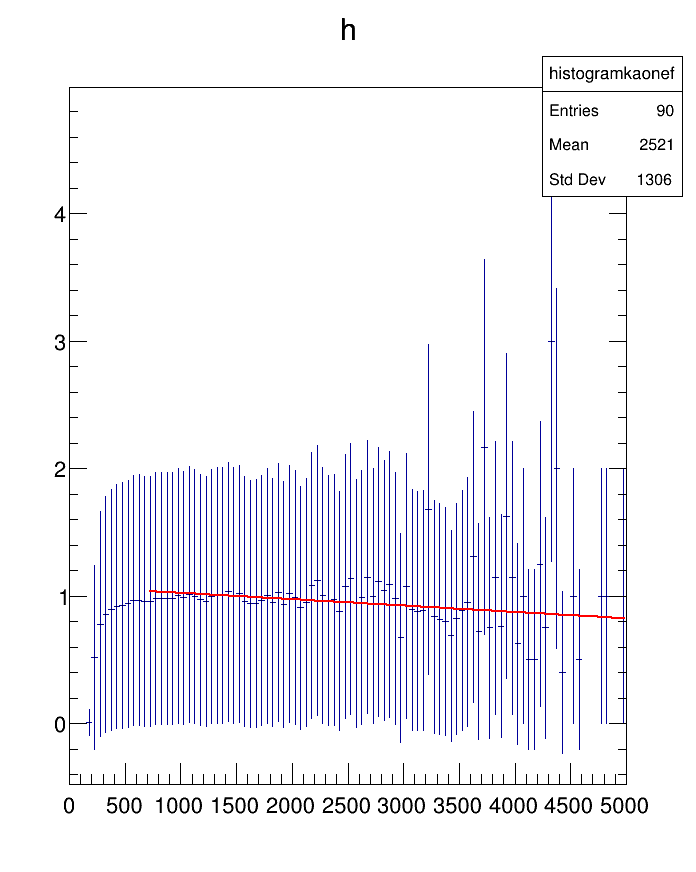

In [51]:
#defining the ratio between k+k- with eff/pi+pi- with eff
c16=TCanvas( 'c16', 'The ratio between histograms', 200, 10, 700, 900 )

  
rp20 = kaonef/Pionef
rp20.Sumw2()
 
c16.SetTicks(0,1)

c16.Update()
#Fiting the histogram for t>700 fs
fratio4=TF1("ratio4", "[6]*(1+x*[7])",700.,5000.)
fratio4.SetParameter(6,1.)
fratio4.SetParameter(7,0.)
rp20.Fit("ratio4","E","",700.,5000.)   
fratio4=rp20.GetFunction("ratio4")

c16.Draw("E")
rp20.Draw()

 FCN=0.809386 FROM MINOS     STATUS=SUCCESSFUL    228 CALLS        6364 TOTAL
                     EDM=1.98944e-09    STRATEGY= 1  ERROR MATRIX UNCERTAINTY 100.0 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           0.00000e+00   6.78823e+00  -0.00000e+00   0.00000e+00
   2  p1           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   3  p2           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   4  p3           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   5  p4           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   6  p5           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   7  p6           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   8  p7           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   9  p8           9.97178e-01   2.11734e-03   5.17138e-06  -4.14781e-09
  10  p9          -1.54848e-

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c18
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created


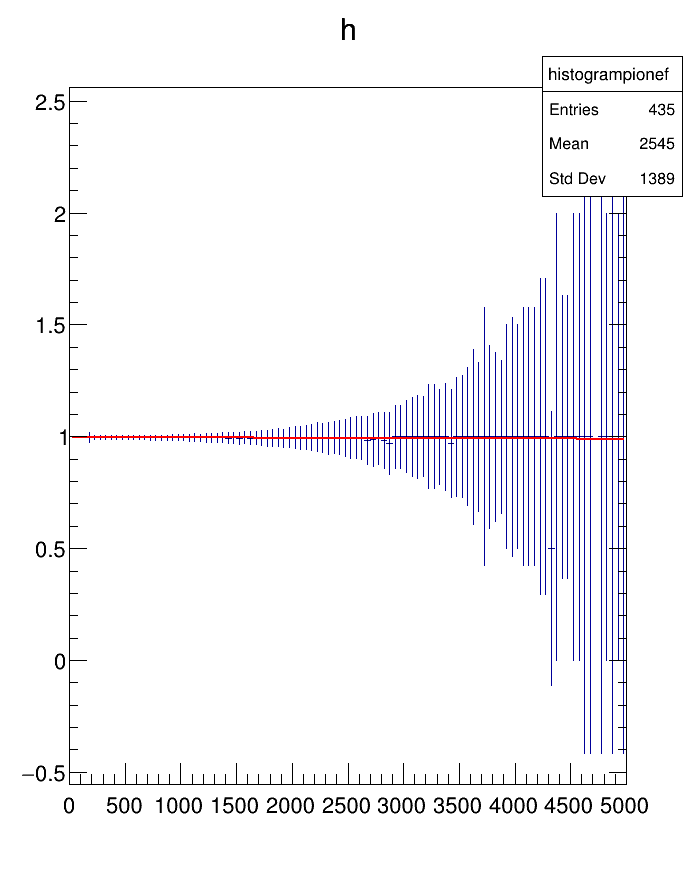

In [52]:
#Now p+p- with eff / p+p-

c18=TCanvas( 'c18', 'The ratio between histograms', 200, 10, 700, 900 )

  
rp21 = Pionef/h3f[0]
rp21.Sumw2()
 
c18.SetTicks(0,1)

c18.Update()

#Fiting the histogram
fratio5=TF1("ratio5", "[8]*(1+x*[9])",0.,5000.)
fratio5.SetParameter(8,1.)
fratio5.SetParameter(9,0.)
rp21.Fit("ratio5","E","",0.,5000.)   
fratio5=rp21.GetFunction("ratio5")

c18.Draw()
rp21.Draw()

Warning in <TFile::Append>: Replacing existing TH1: h2 (Potential memory leak).


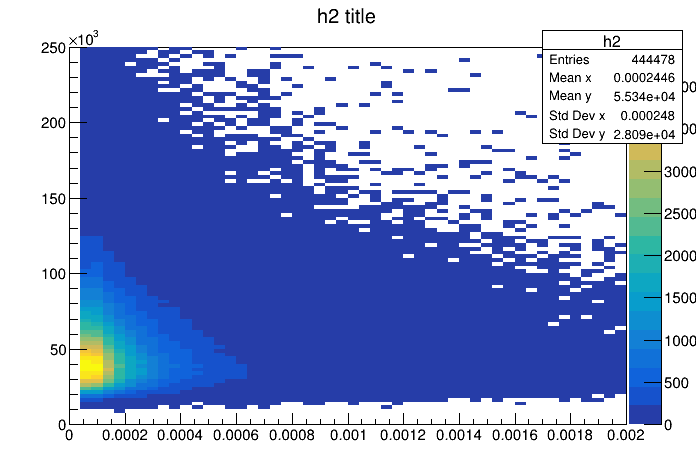

In [139]:
#From here I will try to do the 2D histograms. It is IP-PD0 for pion
from ROOT import TH2F
h2d = TH2F("h2", "h2 title", 50, 0.0, 0.002, 100, 0., 250e3)

for i in range(n2[0]):
    h2d.Fill(IPh1[0][i],arrPD0[0][i])

c2D=TCanvas()
h2d.Draw("COLZ")
c2D.Draw()

Warning in <TFile::Append>: Replacing existing TH1: h22 (Potential memory leak).


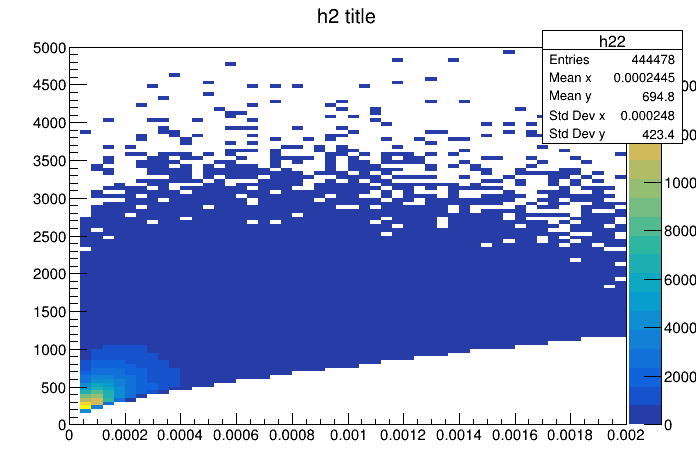

In [136]:
#From here I will try to do the 2D histograms. IP-decaytime for p

h2d2 = TH2F("h22", "h2 title", 50, 0.0, 0.002, 100, 0., 5000)

for i in range(n2[0]):
    h2d2.Fill(IPh1[0][i],arrtime[0][i])

c2D2=TCanvas()
h2d2.Draw("COLZ")
c2D2.Draw()

Warning in <TFile::Append>: Replacing existing TH1: h23 (Potential memory leak).


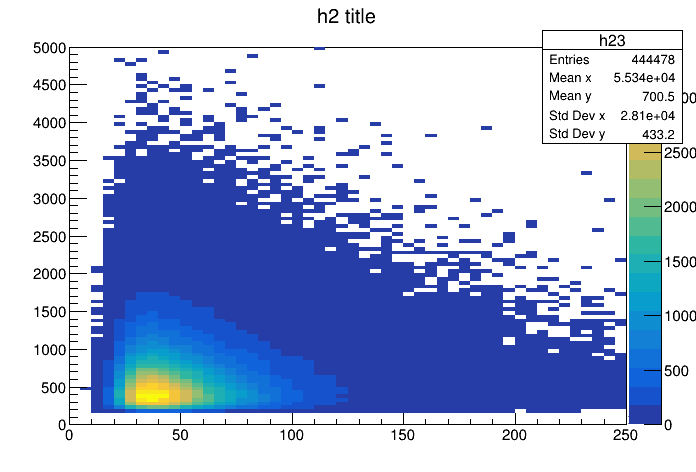

In [137]:
#From here I will try to do the 2D histograms. PD0-decaytime for p

h2d3 = TH2F("h23", "h2 title", 50, 0.0, 250e3, 100, 0., 5000)

for i in range(n2[0]):
    h2d3.Fill(arrPD0[0][i],arrtime[0][i])

c2D3=TCanvas()
h2d3.Draw("COLZ")
c2D3.Draw()

Warning in <TFile::Append>: Replacing existing TH1: h2k (Potential memory leak).


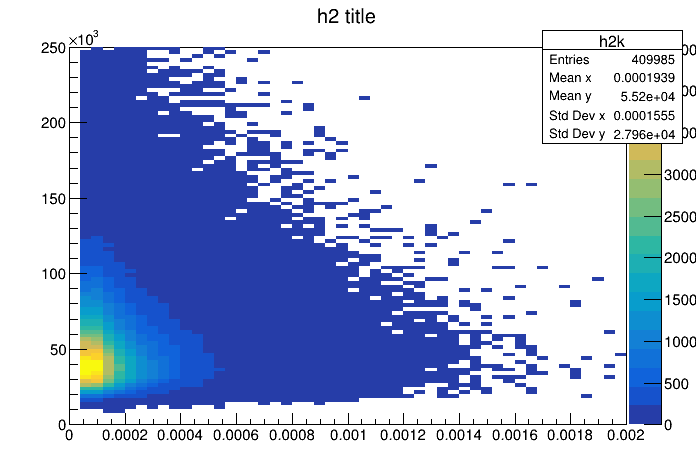

In [135]:
#From here I will try to do the 2D histograms. IP-PD0 for k

h2kd = TH2F("h2k", "h2 title", 50, 0.0, 0.002, 100, 0., 250e3)

for i in range(n2[1]):
    h2kd.Fill(IPh1[1][i],arrPD0[1][i])

c2Dk=TCanvas()
h2kd.Draw("COLZ")
c2Dk.Draw()

Warning in <TFile::Append>: Replacing existing TH1: h2k2 (Potential memory leak).


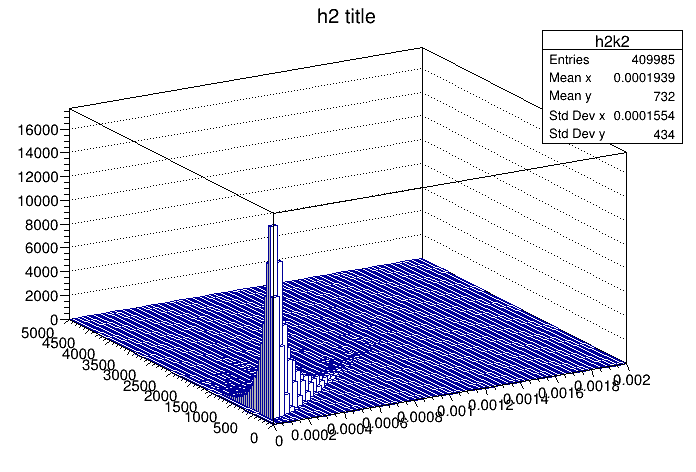

In [132]:
#From here I will try to do the 2D histograms. IP-decaytime for k

h2kd2 = TH2F("h2k2", "h2 title", 50, 0.0, 0.002, 100, 0., 5000)

for i in range(n2[1]):
    h2kd2.Fill(IPh1[1][i],arrtime[1][i])

c2Dk2=TCanvas()
h2kd2.Draw("LEGO1")
c2Dk2.Draw()

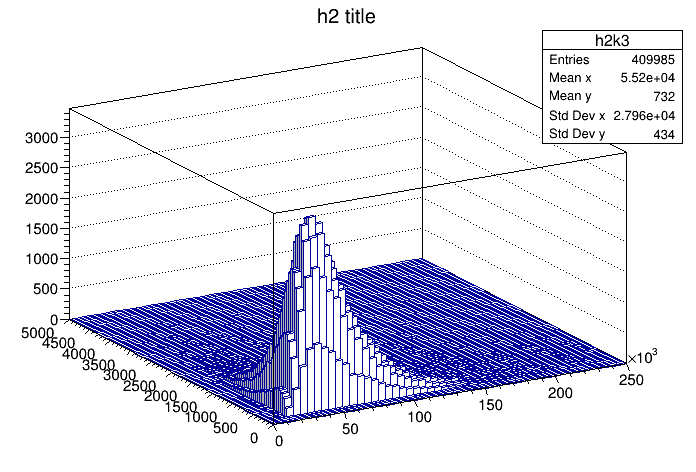

In [133]:
#From here I will try to do the 2D histograms. PD0-decaytime for k

h2kd3 = TH2F("h2k3", "h2 title", 50, 0.0, 250e3, 100, 0., 5000)

for i in range(n2[1]):
    h2kd3.Fill(arrPD0[1][i],arrtime[1][i])

c2Dk3=TCanvas()
h2kd3.Draw("LEGO1")
c2Dk3.Draw()

In [ ]:
#From here, I do the analysis for another IP cut, 100e-6

In [57]:
#Here, I am going to implement again the IP cut but with another IPmin, in this case 100e-6 m

#First, I copy everything because I don't want to erase the results for 50 micro m as IP, but only what I need

arrtime2=arrtime.copy()
arrdistance2=arrdistance.copy()
h1lab2=h1lab.copy()
h2lab2=h2lab.copy()
arrPD02=arrPD0.copy()
IPh12=IPh1.copy()
IPh22=IPh2.copy()

IPmin2=1e-4

#Now, I apply the IP cut method
for j in range(2):
    for i in range(n2[j]-1,-1,-1):
        if abs(IPh12[j][i])<IPmin2 or abs(IPh22[j][i])<IPmin2:
            arrtime2[j]=np.delete(arrtime2[j],i)
            arrdistance2[j]=np.delete(arrdistance2[j],i)
            h1lab2[j]=np.delete(h1lab2[j],i)
            h2lab2[j]=np.delete(h2lab2[j],i)
            arrPD02[j]=np.delete(arrPD02[j],i)
            IPh12[j]=np.delete(IPh12[j],i)
            IPh22[j]=np.delete(IPh22[j],i)
        


In [188]:
print(len(arrtime2[0]),len(arrtime2[1]))
n3=np.array([len(arrtime2[0]),len(arrtime2[1])])

228445 196484


In [189]:
for j in range(2):
    for i in range (n3[j]):
        if IPh12[j][i]<IPmin2 or IPh22[j][i]<IPmin2:
            print (i)

Warning in <TFile::Append>: Replacing existing TH1: new100 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: new1002 (Potential memory leak).


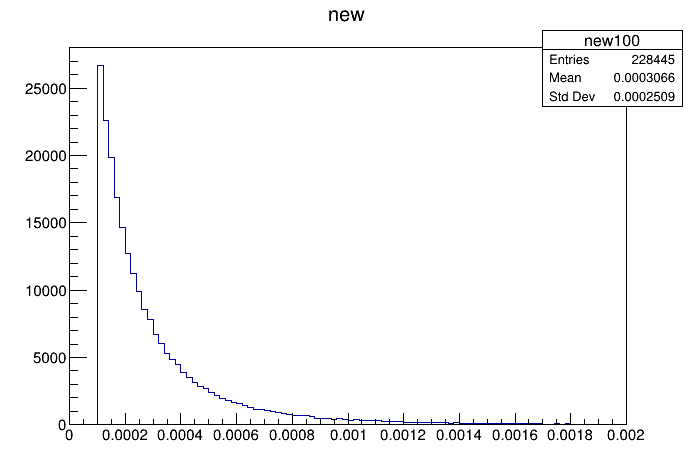

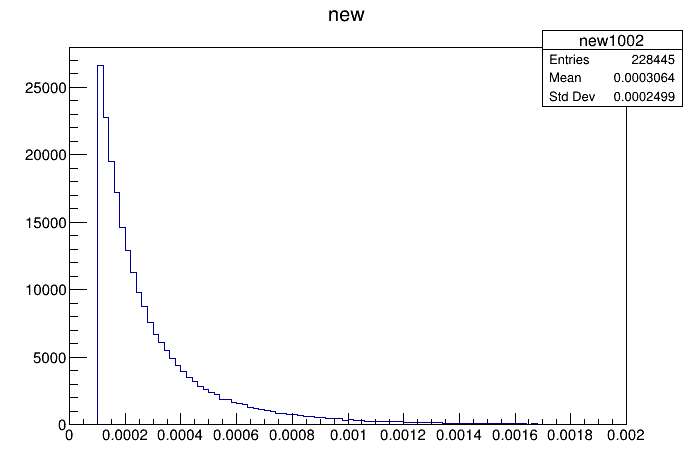

In [90]:
#Histograms of IP for the cut 100e-6 and for j=0, pions
hist2IP=TH1F("new100","new",100,0.,2e-3)
hist2IP2=TH1F("new1002","new",100,0.,2e-3)
for i in range(n3[0]):
    hist2IP.Fill(IPh12[0][i])
    hist2IP2.Fill(IPh22[0][i])
    
c24=TCanvas()
hist2IP.Draw()
c24.Draw()

c25=TCanvas()
hist2IP2.Draw()
c25.Draw()

Warning in <TFile::Append>: Replacing existing TH1: new100k (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: new100k2 (Potential memory leak).


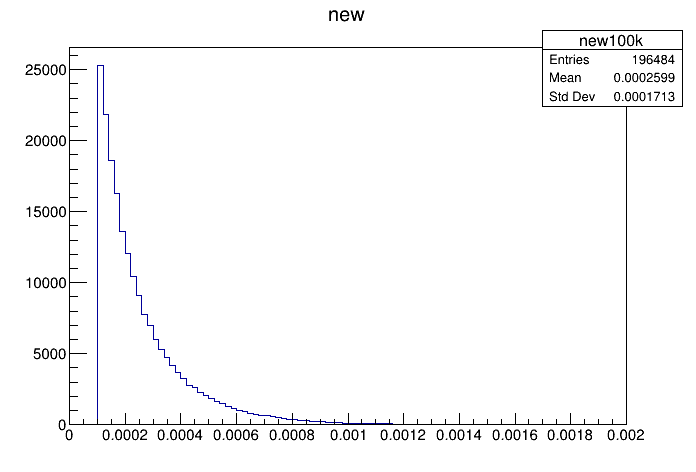

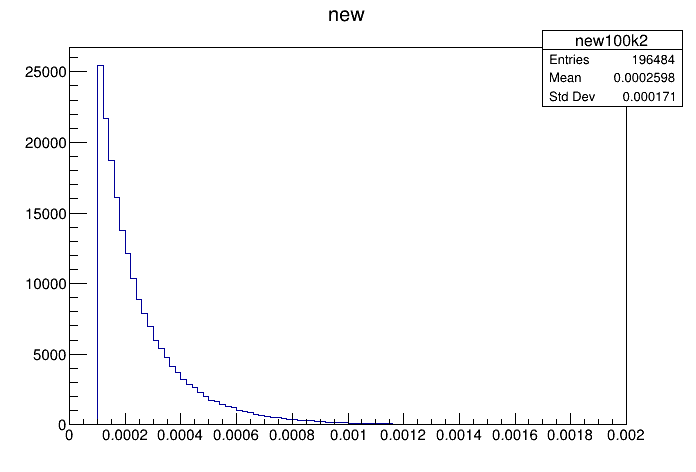

In [92]:
#Histograms of IP for the cut 100e-6 and for j=1, kaons
histk2IP=TH1F("new100k","new",100,0.,2e-3)
histk2IP2=TH1F("new100k2","new",100,0.,2e-3)
for i in range(n3[1]):
    histk2IP.Fill(IPh12[1][i])
    histk2IP2.Fill(IPh22[1][i])
    
c26=TCanvas()
histk2IP.Draw()
c26.Draw()

c27=TCanvas()
histk2IP2.Draw()
c27.Draw()

Warning in <TFile::Append>: Replacing existing TH1: phist100 (Potential memory leak).


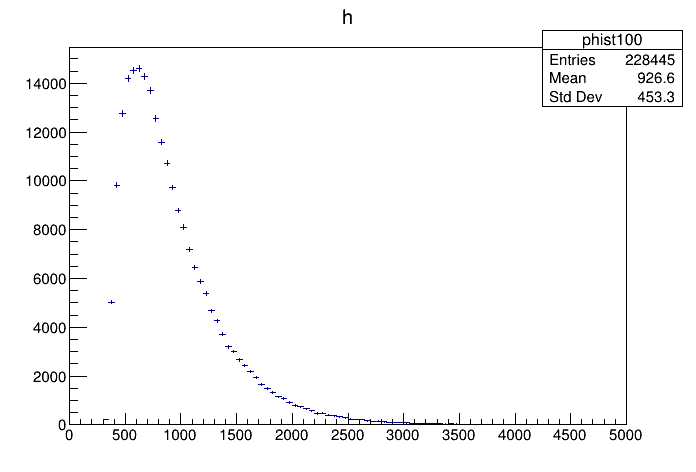

In [141]:
#Here I print all histograms for the pion
c28=TCanvas()
phist100=TH1F('phist100','h',100,0.,5000)

for i in range(n3[0]):
    phist100.Fill(arrtime2[0][i])
    
    
phist100.Sumw2()     
phist100.Draw()
c28.Draw()

Warning in <TFile::Append>: Replacing existing TH1: khist100 (Potential memory leak).


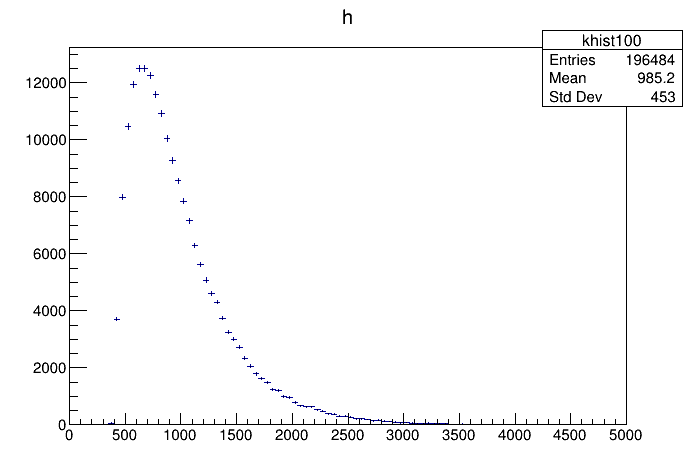

In [140]:
c29=TCanvas()
khist100=TH1F('khist100','h',100,0.,5000)

for i in range(n3[1]):
    khist100.Fill(arrtime2[1][i])
    

khist100.Sumw2()    
khist100.Draw()
c29.Draw()

 FCN=119.12 FROM MINOS     STATUS=SUCCESSFUL    506 CALLS       10250 TOTAL
                     EDM=6.39372e-13    STRATEGY= 1  ERROR MATRIX UNCERTAINTY 100.0 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           0.00000e+00   1.35765e+01  -0.00000e+00   0.00000e+00
   2  p1           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   3  p2           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   4  p3           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   5  p4           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   6  p5           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   7  p6           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   8  p7           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   9  p8           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
  10  p9           0.00000e+00

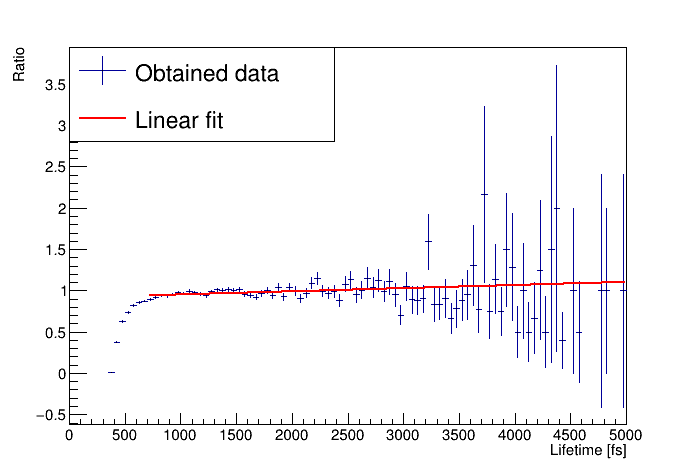

In [331]:
#Ratio of kk/pp both without eff
c30=TCanvas()
ratio100=khist100/phist100

#Fiting the histogram
f100ratio=TF1("f100ratio", "[10]*(1+x*[11])",700.,5000.)
f100ratio.SetParameter(10,1.)
f100ratio.SetParameter(11,0.)
ratio100.Fit("f100ratio","E","",700.,5000.)   
f100ratio=ratio100.GetFunction("f100ratio")

ratio100.Draw("E")
ratio100.GetXaxis().SetTitle("Lifetime [fs]")
ratio100.GetYaxis().SetTitle("Ratio")
ratio100.GetYaxis().SetTitleOffset(1.3)

legend=TLegend(0.1,0.7,0.48,0.9)
legend.AddEntry(ratio100,"Obtained data","lep")
legend.AddEntry(f100ratio,"Linear fit","l")
legend.Draw()
c30.Draw()


In [383]:
arrtime2prueba=arrtime2.copy()
h2lab2prueba=h2lab2.copy()
arrPD02prueba=arrPD02.copy()

In [384]:
#Efficiency method for kaon for IP 100 micro m
j=1
for i in range(n3[j]-2,-1,-1):
    pk=np.sqrt(h2lab2prueba[j][i].Vect().mag2())
    
    if pk<90000.0:
        eff=Keff(pk)/2.0
        
        nrndm=r.Rndm()
        
        if nrndm>eff:
            
            h2lab2prueba[j]=np.delete(h2lab2prueba[j],i)
            arrtime2prueba[j]=np.delete(arrtime2prueba[j],i)
            arrPD02prueba[j]=np.delete(arrPD02prueba[j],i)

In [385]:
print(len(arrtime2prueba[1]))

n3keff=len(arrtime2prueba[1])

97779


In [196]:
#Before there were 196484 and now the previous number

 FCN=89.9755 FROM MINOS     STATUS=SUCCESSFUL    594 CALLS       24744 TOTAL
                     EDM=7.40981e-10    STRATEGY= 1  ERROR MATRIX UNCERTAINTY 100.0 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           0.00000e+00   1.28000e+02  -0.00000e+00   0.00000e+00
   2  p1           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   3  p2           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   4  p3           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   5  p4           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   6  p5           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   7  p6           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   8  p7           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   9  p8           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
  10  p9           0.00000e+0

Warning in <TFile::Append>: Replacing existing TH1: khist100eff (Potential memory leak).


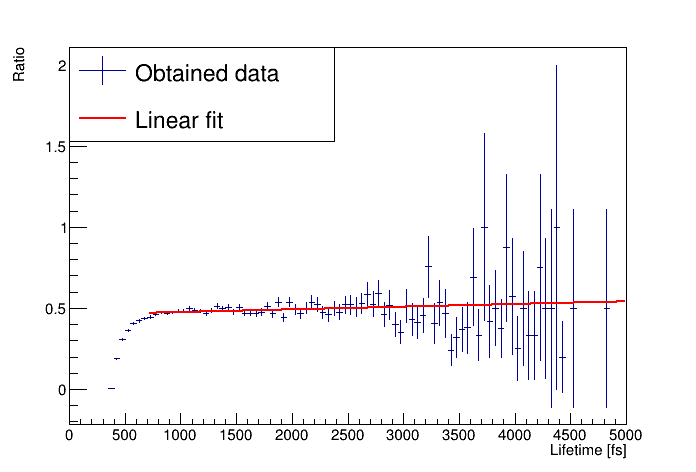

In [386]:
#Ratio between kkeff/pp
c31=TCanvas()
khist100eff=TH1F('khist100eff','h',100,0.,5000)

for i in range(n3keff):
    khist100eff.Fill(arrtime2prueba[1][i])

khist100eff.Sumw2()    
ratio100keff=khist100eff/phist100

#Fiting the histogram
f100ratio1=TF1("f100ratio1", "[12]*(1+x*[13])",700.,5000.)
f100ratio1.SetParameter(12,1.)
f100ratio1.SetParameter(13,0.)
ratio100keff.Fit("f100ratio1","E","",700.,5000.)   
f100ratio1=ratio100keff.GetFunction("f100ratio1")

ratio100keff.Draw("E")
ratio100keff.GetXaxis().SetTitle("Lifetime [fs]")
ratio100keff.GetYaxis().SetTitle("Ratio")
ratio100keff.GetYaxis().SetTitleOffset(1.3)

legend=TLegend(0.1,0.7,0.48,0.9)
legend.AddEntry(ratio100keff,"Obtained data","lep")
legend.AddEntry(f100ratio1,"Linear fit","l")
legend.Draw()
c31.Draw()


 FCN=16.4067 FROM MINOS     STATUS=SUCCESSFUL    540 CALLS       26566 TOTAL
                     EDM=1.77295e-08    STRATEGY= 1  ERROR MATRIX UNCERTAINTY 100.0 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           0.00000e+00   1.28000e+02  -0.00000e+00   0.00000e+00
   2  p1           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   3  p2           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   4  p3           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   5  p4           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   6  p5           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   7  p6           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   8  p7           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   9  p8           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
  10  p9           0.00000e+0

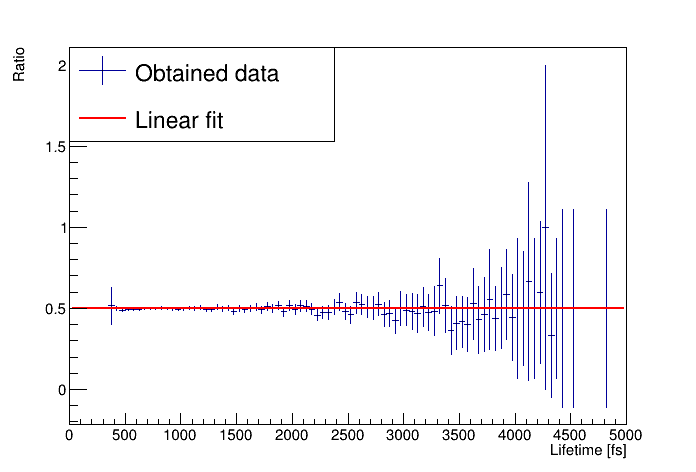

In [387]:
#Ratio between kkeff/kk
c32=TCanvas()
    
ratio100keffk=khist100eff/khist100

#Fiting the histogram
f100ratio1=TF1("f100ratio1", "[12]*(1+x*[13])",0.,5000.)
f100ratio1.SetParameter(12,1.)
f100ratio1.SetParameter(13,0.)
ratio100keffk.Fit("f100ratio1","E","",0.,5000.)   
f100ratio1=ratio100keffk.GetFunction("f100ratio1")

ratio100keffk.Draw("E")
ratio100keffk.GetXaxis().SetTitle("Lifetime [fs]")
ratio100keffk.GetYaxis().SetTitle("Ratio")
ratio100keffk.GetYaxis().SetTitleOffset(1.3)

legend=TLegend(0.1,0.7,0.48,0.9)
legend.AddEntry(ratio100keffk,"Obtained data","lep")
legend.AddEntry(f100ratio1,"Linear fit","l")
legend.Draw()
c32.Draw()

In [199]:
j=0
#Now I apply the eff method for pions
#Method to apply efficiencies to pions
for i in range(n3[0]-2,-1,-1):
    pk2=np.sqrt(h2lab2prueba[j][i].Vect().mag2())
    
    if pk2<24000.0:
        eff2=Peff(pk2)
        
        nrndm2=r.Rndm()
        
        if nrndm2>eff2:
            
            h2lab2prueba[j]=np.delete(h2lab2prueba[j],i)
            arrtime2prueba[j]=np.delete(arrtime2prueba[j],i)
            arrPD02prueba[j]=np.delete(arrPD02prueba[j],i)

In [200]:
n3peff=len(arrtime2prueba[0])
print(n3peff)

227645


In [ ]:
#Before there were 228445

 FCN=120.368 FROM MINOS     STATUS=SUCCESSFUL    594 CALLS       23054 TOTAL
                     EDM=3.62803e-11    STRATEGY= 1  ERROR MATRIX UNCERTAINTY 100.0 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           0.00000e+00   5.65685e+00  -0.00000e+00   0.00000e+00
   2  p1           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   3  p2           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   4  p3           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   5  p4           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   6  p5           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   7  p6           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   8  p7           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   9  p8           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
  10  p9           0.00000e+0

Warning in <TFile::Append>: Replacing existing TH1: phist100eff (Potential memory leak).


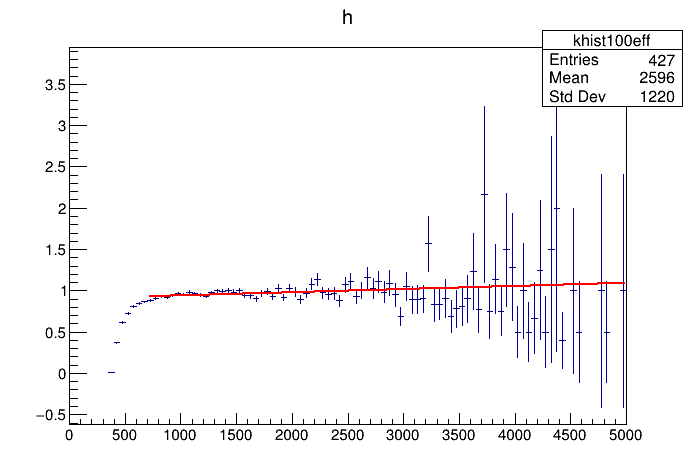

In [201]:
#Ratio between kkeff/ppeff
c33=TCanvas()
phist100eff=TH1F('phist100eff','h',100,0.,5000)

for i in range(n3peff):
    phist100eff.Fill(arrtime2prueba[0][i])
    
phist100eff.Sumw2()
    
ratio100eff=khist100eff/phist100eff

#Fiting the histogram
f100ratio1=TF1("f100ratio1", "[12]*(1+x*[13])",700.,5000.)
f100ratio1.SetParameter(12,1.)
f100ratio1.SetParameter(13,0.)
ratio100eff.Fit("f100ratio1","E","",700.,5000.)   
f100ratio1=ratio100eff.GetFunction("f100ratio1")

ratio100eff.Draw("E")
c33.Draw()

 FCN=0.138897 FROM MINOS     STATUS=SUCCESSFUL    540 CALLS       13337 TOTAL
                     EDM=8.21355e-09    STRATEGY= 1  ERROR MATRIX UNCERTAINTY 100.0 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           0.00000e+00   2.71529e+01  -0.00000e+00   0.00000e+00
   2  p1           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   3  p2           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   4  p3           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   5  p4           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   6  p5           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   7  p6           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   8  p7           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   9  p8           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
  10  p9           0.00000e+

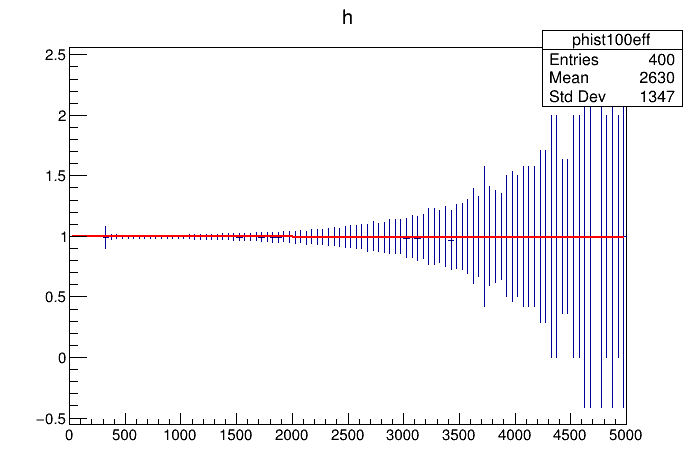

In [202]:
#Ratio between ppeff/pp
c34=TCanvas()
    
ratio100peffp=phist100eff/phist100

#Fiting the histogram
f100ratio1=TF1("f100ratio1", "[12]*(1+x*[13])",0.,5000.)
f100ratio1.SetParameter(12,1.)
f100ratio1.SetParameter(13,0.)
ratio100peffp.Fit("f100ratio1","E","",0.,5000.)   
f100ratio1=ratio100peffp.GetFunction("f100ratio1")

ratio100peffp.Draw("E")
c34.Draw()

In [146]:
#Here, I am going to implement again the IP cut but with another IPmin=200 micro m

#First, I copy everything because I don't want to erase the results for 50 micro m as IP, but only what I need

arrtime3=arrtime2.copy()
arrdistance3=arrdistance2.copy()
h1lab3=h1lab2.copy()
h2lab3=h2lab2.copy()
arrPD03=arrPD02.copy()
IPh13=IPh12.copy()
IPh23=IPh22.copy()

IPmin3=2e-4


#Now, I apply the IP cut method
for j in range(2):
    for i in range(n3[j]-1,-1,-1):
        if abs(IPh13[j][i])<IPmin3 or abs(IPh23[j][i])<IPmin3:
            arrtime3[j]=np.delete(arrtime3[j],i)
            arrdistance3[j]=np.delete(arrdistance3[j],i)
            h1lab3[j]=np.delete(h1lab3[j],i)
            h2lab3[j]=np.delete(h2lab3[j],i)
            arrPD03[j]=np.delete(arrPD03[j],i)
            IPh13[j]=np.delete(IPh13[j],i)
            IPh23[j]=np.delete(IPh23[j],i)

In [149]:
print(len(IPh13[0]),len(IPh23[1]))
n200=[len(IPh13[0]),len(IPh23[1])]

70065 52561


In [379]:
#Now I apply efficiencies for kaon with IP 200 micro m
#First, I copy the results in order not to erase the ones without efficiencies
arrtime3prueba=arrtime3.copy()
h2lab3prueba=h2lab3.copy()
arrPD03prueba=arrPD03.copy()

In [380]:
#Now I apply efficiencies for kaon with IP 200 micro m
#First, I copy the results in order not to erase the ones without efficiencies
arrtime3prueba=arrtime3.copy()
h2lab3prueba=h2lab3.copy()
arrPD03prueba=arrPD03.copy()

#Efficiency method for kaon for IP 200 micro m
j=1

for i in range(n200[j]-2,-1,-1):
    pk=np.sqrt(h2lab3prueba[j][i].Vect().mag2())
    
    if pk<90000.0:
        eff=Keff(pk)
        
        nrndm=r.Rndm()
        
        if nrndm>eff:
            
            h2lab3prueba[j]=np.delete(h2lab3prueba[j],i)
            arrtime3prueba[j]=np.delete(arrtime3prueba[j],i)
            arrPD03prueba[j]=np.delete(arrPD03prueba[j],i)

In [381]:
print(len(arrPD03[1]),len(arrPD03prueba[1]))
n200keff=len(arrPD03prueba[1])

52561 51774


 FCN=0.512607 FROM MINOS     STATUS=SUCCESSFUL    622 CALLS       20604 TOTAL
                     EDM=1.85771e-09    STRATEGY= 1  ERROR MATRIX UNCERTAINTY 100.0 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           0.00000e+00   5.65685e+00  -0.00000e+00   0.00000e+00
   2  p1           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   3  p2           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   4  p3           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   5  p4           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   6  p5           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   7  p6           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   8  p7           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   9  p8           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
  10  p9           0.00000e+

Warning in <TFile::Append>: Replacing existing TH1: khist200eff (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: khist200 (Potential memory leak).
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created


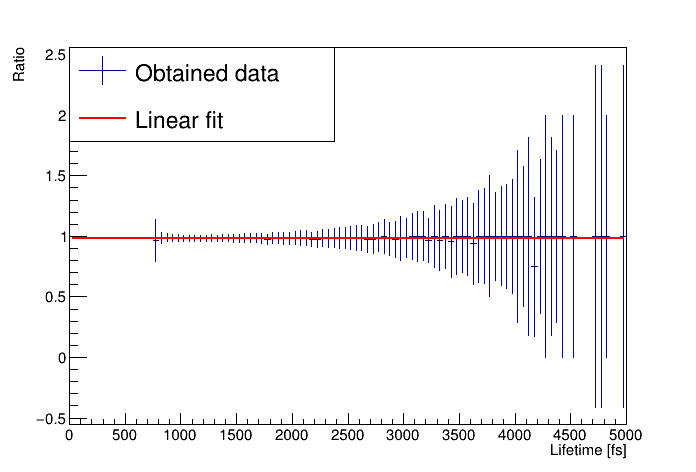

In [382]:
#Here, I am going to compare the histograms for IP200 with eff and without eff, only that one
#I define two histograms and fill them.

khist200eff=TH1F('khist200eff','h',100,0.,5000)
khist200=TH1F('khist200','h',100,0.,5000)

for i in range(n200[1]):
    khist200.Fill(arrtime3[1][i])
    
khist200.Sumw2()

for i in range(n200keff):
    khist200eff.Fill(arrtime3prueba[1][i])
    
khist200eff.Sumw2()

ratiok200=khist200eff/khist200
ratiok200.Sumw2()

#Fiting the histogram
f200ratiok=TF1("f200ratiok", "[12]*(1+x*[13])",0.,5000.)
f200ratiok.SetParameter(12,1.)
f200ratiok.SetParameter(13,0.)
ratiok200.Fit("f200ratiok","E","",0.,5000.)   
f200ratiok=ratiok200.GetFunction("f200ratiok")

c200keff=TCanvas()
ratiok200.Draw()
ratiok200.GetXaxis().SetTitle("Lifetime [fs]")
ratiok200.GetYaxis().SetTitle("Ratio")
ratiok200.GetYaxis().SetTitleOffset(1.3)


legend=TLegend(0.1,0.7,0.48,0.9)
legend.AddEntry(ratiok200,"Obtained data","lep")
legend.AddEntry(f200ratiok,"Linear fit","l")
legend.Draw()
c200keff.Draw()


 FCN=128 FROM MINOS     STATUS=SUCCESSFUL    784 CALLS       26970 TOTAL
                     EDM=8.16102e-10    STRATEGY= 1  ERROR MATRIX UNCERTAINTY 100.0 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           0.00000e+00   1.28000e+02  -0.00000e+00   0.00000e+00
   2  p1           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   3  p2           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   4  p3           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   5  p4           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   6  p5           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   7  p6           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   8  p7           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   9  p8           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
  10  p9           0.00000e+00   

Warning in <TFile::Append>: Replacing existing TH1: khist200 (Potential memory leak).
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created


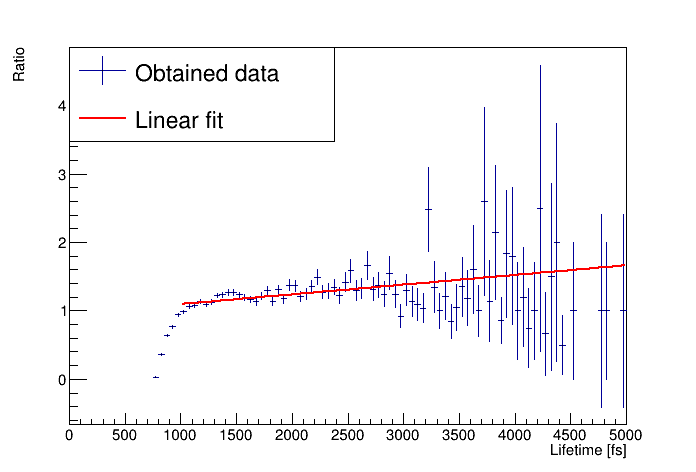

In [344]:
#now I define the histogram for the Pi decay time with IP 200, and I will do the ratio between KK/PP and KKeff/PP 


phist200=TH1F('khist200','h',100,0.,5000)

for i in range(n200[1]):
    phist200.Fill(arrtime3[0][i])
    
phist200.Sumw2()


    
phist200.Sumw2()

ratio200=khist200/phist200
ratio200.Sumw2()

#Fiting the histogram
f200ratio=TF1("f200ratio", "[12]*(1+x*[13])",1000.,5000.)
f200ratio.SetParameter(12,1.)
f200ratio.SetParameter(13,0.)
ratio200.Fit("f200ratio","E","",1000.,5000.)   
f200ratio=ratio200.GetFunction("f200ratio")

c200=TCanvas()
ratio200.Draw()
ratio200.GetXaxis().SetTitle("Lifetime [fs]")
ratio200.GetYaxis().SetTitle("Ratio")
ratio200.GetYaxis().SetTitleOffset(1.3)

legend=TLegend(0.1,0.7,0.48,0.9)
legend.AddEntry(ratio200,"Obtained data","lep")
legend.AddEntry(f200ratio,"Linear fit","l")
legend.Draw()
c200.Draw()

 FCN=112.606 FROM MINOS     STATUS=SUCCESSFUL    676 CALLS       17752 TOTAL
                     EDM=2.85807e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY 100.0 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           0.00000e+00   2.00000e+00  -0.00000e+00   0.00000e+00
   2  p1           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   3  p2           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   4  p3           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   5  p4           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   6  p5           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   7  p6           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   8  p7           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   9  p8           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
  10  p9           0.00000e+0

Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created


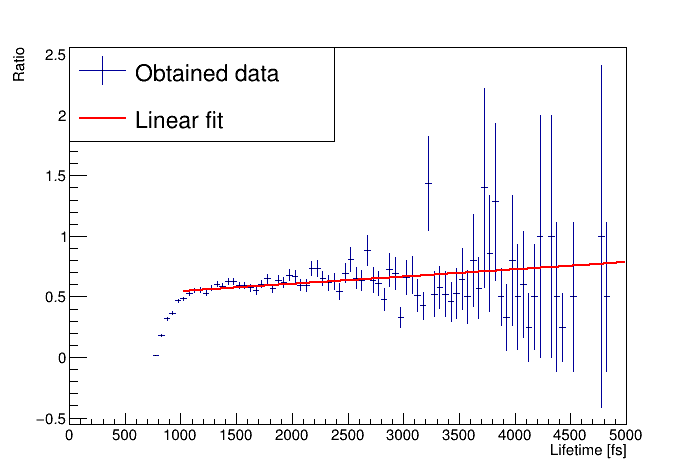

In [350]:
ratio200eff=khist200eff/phist200
ratio200eff.Sumw2()

#Fiting the histogram
f200ratio=TF1("f200ratio", "[12]*(1+x*[13])",1000.,5000.)
f200ratio.SetParameter(12,1.)
f200ratio.SetParameter(13,0.)
ratio200eff.Fit("f200ratio","E","",1000.,5000.)   
f200ratio=ratio200eff.GetFunction("f200ratio")

c200eff=TCanvas()
ratio200eff.Draw()
ratio200eff.GetXaxis().SetTitle("Lifetime [fs]")
ratio200eff.GetYaxis().SetTitle("Ratio")
ratio200eff.GetYaxis().SetTitleOffset(1.3)

legend=TLegend(0.1,0.7,0.48,0.9)
legend.AddEntry(ratio200eff,"Obtained data","lep")
legend.AddEntry(f200ratio,"Linear fit","l")
legend.Draw()
c200eff.SetLogy(0)
c200eff.Draw()

In [273]:
#Here, I am going to show that the slopes of decay time change.
#First, for IP 50, I fill two histograms of decay time: one for P< 50Gev and another for P>50
kthist50l50=TH1F('khist50l50','h',100,0.,5000)
kthist50g50=TH1F('khist50g50','h',100,0.,5000)
for i in range(n2ef):
    if arrPD0prueba[i]<50e3:
        kthist50l50.Fill(arrtimeprueba[i])
    else:
        kthist50g50.Fill(arrtimeprueba[i])
        
kthist50l50.Sumw2()
kthist50g50.Sumw2()

Warning in <TFile::Append>: Replacing existing TH1: khist50l50 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: khist50g50 (Potential memory leak).


In [275]:
#Secondly, for IP 100, I fill two histograms of decay time: one for P< 50Gev and another for P>50
kthist100l50=TH1F('khist100l50','h',100,0.,5000)
kthist100g50=TH1F('khist100g50','h',100,0.,5000)
for i in range(n3keff):
    if arrPD02prueba[1][i]<50e3:
        kthist100l50.Fill(arrtime2prueba[1][i])
    else:
        kthist100g50.Fill(arrtime2prueba[1][i])

        
kthist100l50.Sumw2()
kthist100g50.Sumw2()

Warning in <TFile::Append>: Replacing existing TH1: khist100l50 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: khist100g50 (Potential memory leak).


In [276]:
#Finally, for IP 200, I fill two histograms of decay time: one for P< 50Gev and another for P>50
kthist200l50=TH1F('khist200l50','h',100,0.,5000)
kthist200g50=TH1F('khist200g50','h',100,0.,5000)
for i in range(n200keff):
    if arrPD03prueba[1][i]<50e3:
        kthist200l50.Fill(arrtime3prueba[1][i])
    else:
        kthist200g50.Fill(arrtime3prueba[1][i])
        
kthist200l50.Sumw2()
kthist200g50.Sumw2()

Warning in <TFile::Append>: Replacing existing TH1: khist200l50 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: khist200g50 (Potential memory leak).


Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created


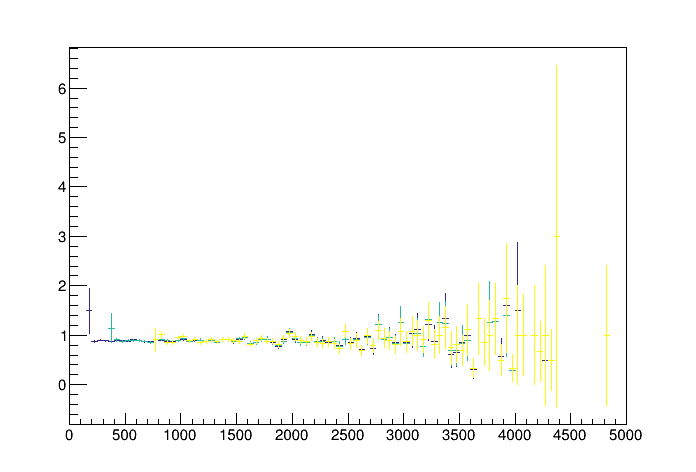

In [287]:
from ROOT import TColor, gStyle
cslopes=TCanvas()
cslopes.SetLogy(0)

gStyle.SetOptTitle(0)
gStyle.SetOptStat(0)



kthist50=kthist50g50/kthist50l50
kthist100=kthist100g50/kthist100l50
kthist200=kthist200g50/kthist200l50

kthist50.Sumw2()
kthist100.Sumw2()
kthist200.Sumw2()

kthist50.Draw("PLC PMC")

kthist100.Draw("SAME PLC PMC")

kthist200.Draw("SAME PLC PMC")

cslopes.Draw()

In [291]:
#Fiting the histogram
fratio=TF1("fratio", "[0]*(1+x*[1])",0.,5000.)
fratio.SetParameter(0,1.)
fratio.SetParameter(1,0.)
kthist200.Fit("fratio","E","",0.,5000.)   
fratio=kthist200.GetFunction("fratio")

 FCN=64.7813 FROM MINOS     STATUS=SUCCESSFUL     30 CALLS         104 TOTAL
                     EDM=2.24345e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           9.35745e-01   2.47104e-02  -6.15026e-04  -2.20057e-02
   2  p1          -3.07668e-05   1.65094e-05   1.65094e-05   1.25558e-06


In [ ]:
#From here, everything is code I used before but I have replaced it. I don-t want to erase it yet if I may need it one day

In [ ]:
"IPmin=float(input("¿Minimum IP in metters? "))


arrtime=[arrtime[i] for i in range(n) if abs(np.sqrt(arrdistance[i].Cross(h1lab[i].Vect()).mag2()/h1lab[i].Vect().mag2()))>IPmin and abs(np.sqrt(arrdistance[i].Cross(h2lab[i].Vect()).mag2()/h2lab[i].Vect().mag2()))>IPmin]
arrdistance2=[arrdistance2[i] for i in range(n) if abs(np.sqrt(arrdistance[i].Cross(h1lab[i].Vect()).mag2()/h1lab[i].Vect().mag2()))>IPmin and abs(np.sqrt(arrdistance[i].Cross(h2lab[i].Vect()).mag2()/h2lab[i].Vect().mag2()))>IPmin]
h1frame=[h1frame[i] for i in range(n) if abs(np.sqrt(arrdistance[i].Cross(h1lab[i].Vect()).mag2()/h1lab[i].Vect().mag2()))>IPmin and abs(np.sqrt(arrdistance[i].Cross(h2lab[i].Vect()).mag2()/h2lab[i].Vect().mag2()))>IPmin]
h2frame=[h2frame[i] for i in range(n) if abs(np.sqrt(arrdistance[i].Cross(h1lab[i].Vect()).mag2()/h1lab[i].Vect().mag2()))>IPmin and abs(np.sqrt(arrdistance[i].Cross(h2lab[i].Vect()).mag2()/h2lab[i].Vect().mag2()))>IPmin]
h1lab2=[h1lab2[i] for i in range(n) if abs(np.sqrt(arrdistance[i].Cross(h1lab[i].Vect()).mag2()/h1lab[i].Vect().mag2()))>IPmin and abs(np.sqrt(arrdistance[i].Cross(h2lab[i].Vect()).mag2()/h2lab[i].Vect().mag2()))>IPmin]
h2lab2=[h2lab2[i] for i in range(n) if abs(np.sqrt(arrdistance[i].Cross(h1lab[i].Vect()).mag2()/h1lab[i].Vect().mag2()))>IPmin and abs(np.sqrt(arrdistance[i].Cross(h2lab[i].Vect()).mag2()/h2lab[i].Vect().mag2()))>IPmin]
h1teta=[h1teta[i] for i in range(n) if abs(np.sqrt(arrdistance[i].Cross(h1lab[i].Vect()).mag2()/h1lab[i].Vect().mag2()))>IPmin and abs(np.sqrt(arrdistance[i].Cross(h2lab[i].Vect()).mag2()/h2lab[i].Vect().mag2()))>IPmin]
h2teta=[h2teta[i] for i in range(n) if abs(np.sqrt(arrdistance[i].Cross(h1lab[i].Vect()).mag2()/h1lab[i].Vect().mag2()))>IPmin and abs(np.sqrt(arrdistance[i].Cross(h2lab[i].Vect()).mag2()/h2lab[i].Vect().mag2()))>IPmin]
arrbtD0=[arrbtD0[i] for i in range(n) if abs(np.sqrt(arrdistance[i].Cross(h1lab[i].Vect()).mag2()/h1lab[i].Vect().mag2()))>IPmin and abs(np.sqrt(arrdistance[i].Cross(h2lab[i].Vect()).mag2()/h2lab[i].Vect().mag2()))>IPmin]
arrgmD0=[arrgmD0[i] for i in range(n) if abs(np.sqrt(arrdistance[i].Cross(h1lab[i].Vect()).mag2()/h1lab[i].Vect().mag2()))>IPmin and abs(np.sqrt(arrdistance[i].Cross(h2lab[i].Vect()).mag2()/h2lab[i].Vect().mag2()))>IPmin]
arrboost=[arrboost[i] for i in range(n) if abs(np.sqrt(arrdistance[i].Cross(h1lab[i].Vect()).mag2()/h1lab[i].Vect().mag2()))>IPmin and abs(np.sqrt(arrdistance[i].Cross(h2lab[i].Vect()).mag2()/h2lab[i].Vect().mag2()))>IPmin]
arrelab=[arrelab[i] for i in range(n) if abs(np.sqrt(arrdistance[i].Cross(h1lab[i].Vect()).mag2()/h1lab[i].Vect().mag2()))>IPmin and abs(np.sqrt(arrdistance[i].Cross(h2lab[i].Vect()).mag2()/h2lab[i].Vect().mag2()))>IPmin]
arrtetaD0=[arrtetaD0[i] for i in range(n) if abs(np.sqrt(arrdistance[i].Cross(h1lab[i].Vect()).mag2()/h1lab[i].Vect().mag2()))>IPmin and abs(np.sqrt(arrdistance[i].Cross(h2lab[i].Vect()).mag2()/h2lab[i].Vect().mag2()))>IPmin]
arrPD0=[arrPD0[i] for i in range(n) if abs(np.sqrt(arrdistance[i].Cross(h1lab[i].Vect()).mag2()/h1lab[i].Vect().mag2()))>IPmin and abs(np.sqrt(arrdistance[i].Cross(h2lab[i].Vect()).mag2()/h2lab[i].Vect().mag2()))>IPmin]
arrphiD0=[arrphiD0[i] for i in range(n) if abs(np.sqrt(arrdistance[i].Cross(h1lab[i].Vect()).mag2()/h1lab[i].Vect().mag2()))>IPmin and abs(np.sqrt(arrdistance[i].Cross(h2lab[i].Vect()).mag2()/h2lab[i].Vect().mag2()))>IPmin]
arrteta=[arrteta[i] for i in range(n) if abs(np.sqrt(arrdistance[i].Cross(h1lab[i].Vect()).mag2()/h1lab[i].Vect().mag2()))>IPmin and abs(np.sqrt(arrdistance[i].Cross(h2lab[i].Vect()).mag2()/h2lab[i].Vect().mag2()))>IPmin]"






In [ ]:
#Method to implement the efficiencies in the detection of K-. By default, the k- will be the particles generated
#in the rest frame in the oposite direction taken for thteta, h2frame and h2lab, and the second group of meson D0,
#so j=1

for i in range(n2[1]-1,-1,-1):
    pk=h2lab[1][i].Vect().mag2()
    if pk<90.0:
        eff=Feff(pk)
        nrndm=r.Rndm()
        if nrndm>eff:
            arrtime[1]=np.delete(arrtime[1],i)
            arrdistance[1]=np.delete(arrdistance[1],i)
            h1frame[1]=np.delete(h1frame[1],i)
            h2frame[1]=np.delete(h2frame[1],i)
            h1lab[1]=np.delete(h1lab[1],i)
            h2lab[1]=np.delete(h2lab[1],i)
            h1teta[1]=np.delete(h1teta[1],i)
            h2teta[1]=np.delete(h2teta[1],i)
            arrbtD0[1]=np.delete(arrbtD0[1],i)
            arrgmD0[1]=np.delete(arrgmD0[1],i)
            arrboost[1]=np.delete(arrboost[1],i)
            arrelab[1]=np.delete(arrelab[1],i)
            arrtetaD0[1]=np.delete(arrtetaD0[1],i)
            arrPD0[1]=np.delete(arrPD0[1],i)
            arrphiD0[1]=np.delete(arrphiD0[1],i)
            arrteta[1]=np.delete(arrteta[1],i)
            
        
    
